# Final Challenge Code:Nation Data Science
***

> ## Purpose:
The purpose of this product is to provide an automated service that recommends leads to a user given their current customer list (Portfolio).

***
## Description of steps:
- Data Preparation:
> - Import Libraries and files
> - T1 - preparation 1: Collection in the market of missing information in the portfolio;
> - T2 - preparation 2: Exclusion of features with high percentage of NA's values and filling of the remaining NA's;
> - T3 - preparation 3: Conversion of values to numeric type;
> - T4 - preparation 4: Label customers and not customers;
> - T5 - preparation 5: Balance dataset and Split train and test data;
- Organization of Datasets preparation for the models;
- Prediction models:
> - Models;
> - Benchmarking;
> - Apply the best model;
- Recommendation:
> - Total of possible customers;
> - Ranking;
> - Recommendation with original values;
> - Save recommendation in csv files;
- Portfolio x prediction
> - Graphs;
> - Verify similar features values;
- Extras:
> - Companies with tax, legal, financial or operational issues.

***
> ***
***
# Data Preparation:

***
## Libraries and Files:

> ### Packages:

In [1]:
# Data handling:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# models: 
import sklearn
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors.nearest_centroid import NearestCentroid
# Merics:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from scipy.spatial import distance
# Graphics
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
%matplotlib inline

> ### Data:

In [2]:
market = pd.read_csv("market.csv")
dictionary = pd.read_csv("dicionario.csv")

In [3]:
portfolio = pd.read_csv("portfolio.csv")

In [4]:
# Adjust for viewing:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', len(market.columns))
pd.set_option('display.max_rows', len(market))

import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

***
## T1 - Dataset complete Portfolio:
The portfolio dataset has only the column 'id', we will complete with the other data that are present in the dataset market.

In [5]:
# DataFrame handling  Step 1:
market_T1= market.copy()

# Creation of id_num column to help manipulation:
market_T1['id_num'] = market_T1['Unnamed: 0']

# Delete column 'Unnamed: 0':
market_T1 = market_T1.drop(['Unnamed: 0'], axis = 1)

# Complete portfolio generation:
portfolio_T1 = pd.DataFrame(portfolio['id'])
portfolio_T1 = pd.merge(portfolio_T1, market_T1, on='id', how='left')

> ### Heads:

In [6]:
market_T1.head(3)

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais,id_num
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,

In [7]:
portfolio_T1.head(3)

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais,id_num
0,bb61c09449a1c1f8b78955d8b7a7f73599e78358993fe24b56a3e11f7d6a0bce,True,MUNICIPIO,MA,OUTROS,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,21.813699,> 20,False,False,False,Fa

> ### Shapes(Rows x Columns):

In [8]:
print('Market:', market_T1.shape)
print('Portfolio:', portfolio_T1.shape)

Market: (462298, 182)
Portfolio: (265, 182)


***
## T2 - NA's Handling

> ### NA's per columns:

In [9]:
# NA's percentage check
qt_na_per_col_portfolio_T1 = pd.DataFrame(portfolio_T1.isna().sum().sort_values(ascending=False).reset_index())
qt_na_per_col_portfolio_T1.columns = ['Column', 'qt_NA']
qt_na_per_col_portfolio_T1['qt_not_NA'] = (len(portfolio_T1) - qt_na_per_col_portfolio_T1['qt_NA'])
qt_na_per_col_portfolio_T1['Percentage_of_NA'] = ((qt_na_per_col_portfolio_T1['qt_NA'] * 100) / len(portfolio_T1)).round(2)
qt_na_per_col_portfolio_T1.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181
Column,grau_instrucao_macro_desconhecido,qt_alteracao_socio_90d,vl_total_veiculos_antt,vl_total_veiculos_antt_grupo,qt_socios_st_suspensa,qt_alteracao_socio_365d,qt_alteracao_socio_180d,qt_alteracao_socio_total,idade_media_coligadas_baixadas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,vl_total_tancagem_grupo,vl_total_tancagem,qt_socios_pep,qt_socios_pj_baixados,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_socios_pj_nulos,qt_socios_pj_ativos,qt_socios_pj_suspensos,vl_potenc_cons_oleo_gas,total_filiais_coligados,min_filiais_coligados,max_filiais_coligados,media_filiais_coligados,qt_socios_feminino,idade_ate_18,max_vl_folha_coligados,min_vl_folha_coligados,media_vl_folha_coligados,vl_folha_coligados,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,vl_folha_coligados_gp,min_funcionarios_coligados_gp,max_funcionarios_coligados_gp,qt_funcionarios_coligados_gp,qt_funcionarios_coligados,media_funcionarios_coligados_gp,grau_instrucao_macro_analfabeto,media_faturamento_est_coligados,min_faturamento_est_coligados_gp,faturamento_est_coligados,sum_faturamento_estimado_coligadas,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,qt_coligados_inapta,qt_coligados_baixada,qt_coligados_nula,qt_coligados_ativo,qt_coligados_matriz,qt_coligados_centro,qt_socios_coligados,qt_coligados,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_coligados_suspensa,qt_coligados_sa,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,qt_ramos_coligados,qt_coligados_nordeste,qt_coligados_sul,qt_coligados_norte,qt_coligados_epp,qt_coligados_ltda,qt_coligados_me,qt_regioes_coligados,qt_coligados_mei,qt_coligados_industria,qt_coligadas,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_coligados_agropecuaria,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_socios_masculino,qt_socios_st_regular,idade_minima_socios,idade_maxima_socios,idade_media_socios,qt_socios_pf,qt_socios_pj,qt_socios,qt_art,idade_de_19_a_23,de_indicador_telefone,vl_frota,empsetorcensitariofaixarendapopulacao,vl_total_veiculos_leves,vl_total_veiculos_pesados,nm_micro_regiao,nm_meso_regiao,grau_instrucao_macro_escolaridade_fundamental,idade_de_24_a_28,idade_acima_de_58,grau_instrucao_macro_escolaridade_superior,fl_optante_simei,idade_de_54_a_58,fl_optante_simples,nu_meses_rescencia,tx_crescimento_24meses,idade_de_29_a_33,nm_divisao,fl_matriz,sg_uf_matriz,vl_total_veiculos_leves_grupo,vl_total_veiculos_pesados_grupo,fl_veiculo,de_natureza_juridica,fl_antt,fl_spa,nm_segmento,fl_st_especial,dt_situacao,fl_rm,sg_uf,fl_telefone,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_email,id_num,de_saude_tributaria,total,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_rotatividade,mes

> ### Exclusion High Percent NA Columns:

In [10]:
# DataFrame preparation Step 2:
market_T2 = market_T1.copy()
# NA Limit
percent_NA = 55
# Selection of all columns that have high NA's:
column_NA_exclusion = qt_na_per_col_portfolio_T1['Column'].loc[qt_na_per_col_portfolio_T1['Percentage_of_NA'] >= percent_NA]
# Exclusion of columns:
market_T2 = market_T2.drop(column_NA_exclusion, axis = 1)
# New shape after delete High percent NA columns:
market_T2.shape

(462298, 83)

> ### Data Types:

In [11]:
# Types:
types_market_T2 = pd.DataFrame(market_T2.dtypes).reset_index()
types_market_T2.columns = ['Columns', 'types']
types_market_T2.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82
Columns,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais,id_num
types,object,bool,object,object,object,object,object,float64,object,bool,bool,bool,bool,bool,object,bool,bool,bool,object,object,object,object,object,object,float64,float64,object,float64,float64,float64,object,object,object,object,float64,object,object,object,float64,float64,object,object,object,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64


In [12]:
# type lists:
type_float = list (market_T2.select_dtypes (include = ['float']). columns)
type_int = list (market_T2.select_dtypes (include = ['int']). columns)
type_bool = list (market_T2.select_dtypes (include = ['bool']). columns)
type_object = list (market_T2.select_dtypes (include = ['object']). columns)

In [13]:
# Removal of identifying columns from type lists:
type_object.remove('id')
type_int.remove('id_num')
# Remove dt_situacao
type_object.remove('dt_situacao')

> ### Fill NA'S:
- Numeric variables by 0;
- Categorical variables by value 'INDETERMINADA';

In [14]:
# Fill Na's
market_T2[type_int] = market_T2[type_int].fillna(0)
market_T2[type_float] = market_T2[type_float].fillna(0)
market_T2[type_object] = market_T2[type_object].fillna('INDETERMINADA')

In [15]:
# Dataframe after preparation:
market_T2.head(3)

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais,id_num
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,False,False,False,False,2005-03-25,False,True,True,SIM,CONSTRUCAO DE EDIFICIOS,CONSTRUCAO,False,False,False,0.0,0.0,True,8.0,0.0,0.0,False,RN,VERDE,ACIMA DE 1 ANO,23.0,ALTA,BOA,False,0.0,0.00,LESTE POTIGUAR,NATAL,True,"DE R$ 1.500.000,01 A R$ 4.800.000,00","DE R$ 1.500.000,01 A R$ 4.800.000,00",3132172.8,3132172.8,119.0,26.0,100.0,0.0,1.0,4.0,6.0,5.0,3.0,4.0,2.0,0.0,1.0,1.0,25.0,0.0,26.0,19.166667,0.0,0.0,119.0,145.0,13.309195,93.266667,-0.933333,43.738462,93.266667,19.166667,26.0,26.0,27.0,0.0,-3.703704,0.0,0,0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,True,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1.463014,1 a 5,False,False,False,True,False,2017-05-12,False,True,True,SIM,ALIMENTACAO,ALOJAMENTO E ALIMENTACAO,False,False,False,0.0,0.0,INDETERMINADA,0.0,0.0,0.0,INDETERMINADA,PI,CINZA,ATE 1 ANO,9.0,BAIXA,INDETERMINADA,False,0.0,468.93,CENTRO NORTE PIAUIENSE,TERESINA,True,"DE R$ 81.000,01 A R$ 360.000,00","DE R$ 81.000,01 A R$ 360.000,00",210000.0,210000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0,1
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08,True,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,7.093151,5 a 10,False,False,False,True,False,2011-09-26,False,False,True,SIM,TRANSPORTE TERRESTRE,TRANSPORTE ARMAZENAGEM E CORREIO,False,False,False,0.0,0.0,True,0.0,0.0,0.0,True,AM,AMARELO,ACIMA DE 1 ANO,26.0,MEDIA,INDETERMINADA,False,0.0,713.50,CENTRO AMAZONENSE,MANAUS,True,"ATE R$ 81.000,00","ATE R$ 81.000,00",50000.0,50000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0,2


In [16]:
# Comparative:
print('Starter Market:', market_T1.shape)
print('Market after handling:', market_T2.shape)
print('Unimportant columns deleted:', market_T1.shape[1] - market_T2.shape[1])

Starter Market: (462298, 182)
Market after handling: (462298, 83)
Unimportant columns deleted: 99


***
## T3 - Variable coding:

In [17]:
# DataFrame preparation step 5:
market_T3 = market_T2.copy()
market_T3_a = market_T3[['id', 'id_num']]
# Exclusion of identification variables:
market_T3_b = market_T3.drop(['id', 'id_num'], axis = 1)
# Conversions:
market_T3_b[type_float] = market_T3_b[type_float].astype('int')
market_T3_b[type_bool] = market_T3_b[type_bool].astype('category')
market_T3_b[type_bool] = market_T3_b[type_bool].apply(lambda x: x.cat.codes)
market_T3_b[type_object] = market_T3_b[type_object].astype('category')
market_T3_b[type_object] = market_T3_b[type_object].apply(lambda x: x.cat.codes)
# Market Reconstruction:
market_T3 = pd.DataFrame()
market_T3 = pd.concat([market_T3_a, market_T3_b], axis=1)
market_T3 = market_T3.drop(['dt_situacao'], axis=1)

In [18]:
# Market after T3:
market_T3.head(3)

,id,id_num,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,0,1,60,4,2,11,2,14,1,0,0,0,0,0,0,1,1,1,32,10,0,0,0,0,0,1,8,0,0,0,20,5,0,23,0,0,0,0,0,7,49,1,2,2,3132172,3132172,119,26,100,0,1,4,6,5,3,4,2,0,1,1,25,0,26,19,0,0,119,145,13,93,0,43,93,19,26,26,27,0,-3,0,0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,1,1,17,3,5,21,5,1,0,0,0,0,1,0,0,1,1,1,3,3,0,0,0,0,0,2,0,0,0,2,17,2,1,9,1,1,0,0,468,4,70,1,10,10,210000,210000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08,2,1,17,1,5,32,5,7,3,0,0,0,1,0,0,0,1,1,87,21,0,0,0,0,0,1,0,0,0,1,2,0,0,26,3,1,0,0,713,2,44,1,1,1,50000,50000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
# Portfolio after T3
portfolio_T3 = pd.DataFrame(portfolio['id'])
portfolio_T3['Tr_exc'] = portfolio_T3['id'].isin(market_T3['id'])
portfolio_T3 = portfolio_T3[portfolio_T3['Tr_exc'] == True]
portfolio_T3 = portfolio_T3.drop(['Tr_exc'], axis = 1)
portfolio_T3 = pd.merge(portfolio_T3, market_T3, on='id', how='left')
# Full Portfolio View:
portfolio_T3.head(3)

,id,id_num,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,bb61c09449a1c1f8b78955d8b7a7f73599e78358993fe24b56a3e11f7d6a0bce,3116,1,33,2,5,0,5,21,5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,5,2,0,0,2,5,0,10,5,0,26,0,1,0,275282,644,11,53,1,4,4,141308380,144348380,100,745,36,63,0,44,107,162,161,113,69,44,45,117,106,522,745,40,0,0,100,845,133,259,-2,144,259,40,745,745,745,0,0,0,2
1,16843c9ffb920170477118933798510d8d5f00f5c56c1221773356355bded321,3681,1,64,3,2,22,5,16,2,0,0,0,0,0,0,0,1,0,36,11,0,0,1,1,1,0,1,1,1,0,17,5,0,23,0,0,0,60101,688,10,11,1,3,3,27818640,27818640,172,119,52,47,1,10,27,30,20,15,11,3,2,19,9,91,119,4,21,7,172,291,42,149,0,65,149,4,119,104,113,14,5,6,0
2,1b8d092daff12bed8b3c2ab93bf5df2921865a68aca185f51e31e7105abb0c48,4784,1,42,1,0,0,5,40,5,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,32,0,0,0,2,1,0,23,0,0,0,0,1881,2,44,1,5,5,92728800,92728800,121,170,43,56,1,7,10,11,12,9,14,33,73,56,26,88,170,24,0,0,121,291,216,5014,0,284,557,24,170,170,177,0,-3,0,0


***
## T4 - Label clients:

In [20]:
# DataFrame preparation Step 4:
market_T4 = market_T3.copy()
portfolio_T4 = portfolio_T3.copy()
# assign value 1 to customers:
portfolio_T4['cliente'] = 1
# assign value 1 to non-customers:
market_T4['cliente'] = 0
# assign value 1 to portfolio's customers in market:
market_T4.loc[market_T4['id'].isin(portfolio_T4['id']), ['cliente']] = 1
# client and non-clients count:
market_T4['cliente'].value_counts()

0    462033
1    265   
Name: cliente, dtype: int64

In [21]:
# Data normalization:
min_max_scaler = preprocessing.MinMaxScaler()
market_T4[type_int] = min_max_scaler.fit_transform(market_T4[type_int])
market_T4[type_float] = min_max_scaler.fit_transform(market_T4[type_float])
market_T4[type_object] = min_max_scaler.fit_transform(market_T4[type_object])

# Portfolio reconstruction T4
portfolio_T4 = pd.DataFrame(portfolio['id'])
portfolio_T4['Tr_exc'] = portfolio_T4['id'].isin(market_T4['id'])
portfolio_T4 = portfolio_T4[portfolio_T4['Tr_exc'] == True]
portfolio_T4 = portfolio_T4.drop(['Tr_exc'], axis = 1)
portfolio_T4 = pd.merge(portfolio_T4, market_T4, on='id', how='left')

In [22]:
# Market after T4
market_T4.head(3)

,id,id_num,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais,cliente
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,0,1,0.909091,0.8,0.333333,0.34375,0.4,0.132075,0.2,0,0,0,0,0,0,1,1,1.0,0.367816,0.476190,0.0,0.0,0.0,0.0,0.0,0.5,0.007866,0.0,0.0,0.0,0.740741,0.833333,0.0,0.348485,0.00,0.0,0.0,0.0,0.000000,0.368421,0.671233,0.5,0.166667,0.181818,0.000215,1.406063e-05,0.005521,0.00001,1.0,0.0,0.00043,0.002894,0.001776,0.000769,0.000445,0.000609,0.000209,0.0,0.00011,0.000123,0.000997,0.0,0.000504,0.003726,0.0,0.0,0.005518,0.002021,0.022111,0.037493,0.019612,0.008433,0.018239,0.003726,0.000504,0.000504,0.000498,0.003584,0.001110,0.0,0.0,0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,1,1,0.257576,0.6,0.833333,0.65625,1.0,0.009434,0.0,0,0,0,1,0,0,1,1,1.0,0.034483,0.142857,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,1.0,0.629630,0.333333,0.2,0.136364,0.25,1.0,0.0,0.0,0.006232,0.210526,0.958904,0.5,0.833333,0.909091,0.000014,9.427110e-07,0.000000,0.00000,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.019612,0.019612,0.019612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003584,0.001144,0.0,0.0,0
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08,2,1,0.257576,0.2,0.833333,1.00000,1.0,0.066038,0.6,0,0,0,1,0,0,0,1,1.0,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.5,0.000000,0.0,0.0,0.5,0.074074,0.000000,0.0,0.393939,0.75,1.0,0.0,0.0,0.009495,0.105263,0.602740,0.5,0.083333,0.090909,0.000003,2.244550e-07,0.000000,0.00000,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.019612,0.019612,0.019612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003584,0.001144,0.0,0.0,0


***
## T5 - Train and test data:

> ### Create dataset for train and test:

In [23]:
# DataFrame preparation Step 5:
market_T5 = market_T4.copy()
portfolio_T5 = portfolio_T4.copy()
# market without current customers:
market_T5_without_clients = pd.DataFrame(market_T5['id'])
market_T5_without_clients['Tr_exc'] = market_T5_without_clients['id'].isin(portfolio_T5['id'])
market_T5_without_clients = market_T5_without_clients[market_T5_without_clients['Tr_exc'] != True]
market_T5_without_clients = market_T5_without_clients.drop(['Tr_exc'], axis = 1)
market_T5_without_clients = pd.merge(market_T5_without_clients, market_T5, on='id', how='left')

In [24]:
# random value
random_vl=42
# Number of customers:
num_clients = len(portfolio_T5)
# get non-customers for balance dataset: 
non_clients_sample = market_T5_without_clients.sample(n=num_clients, random_state = random_vl)
# Create dataset with customers and non-customers
frames = [portfolio_T5, non_clients_sample ]
dataset = pd.concat(frames)
# Dataset train and test:
dataset.head(3)

,id,id_num,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais,cliente
0,bb61c09449a1c1f8b78955d8b7a7f73599e78358993fe24b56a3e11f7d6a0bce,3116,1,0.500000,0.4,0.833333,0.0000,1.0,0.198113,1.0,0,0,0,0,0,0,1,0,0.0,0.000000,0.00000,0.0,0.0,0.5,0.010225,0.005510,0.0,0.000000,0.000204,0.000041,0.0,0.370370,0.833333,0.0,0.393939,0.0,1.0,0.0,0.004928,0.008576,0.578947,0.726027,0.5,0.333333,0.363636,0.009714,0.000648,0.004639,0.000279,0.36,0.63,0.00000,0.031838,0.031666,0.024923,0.023873,0.017194,0.007204,0.004838,0.004953,0.014336,0.004228,0.025320,0.014455,0.007845,0.000000,0.000000,0.004637,0.011777,0.045184,0.069410,0.019227,0.028241,0.050794,0.007845,0.014453,0.014453,0.013744,0.003584,0.001144,0.000000,0.000207,1
1,16843c9ffb920170477118933798510d8d5f00f5c56c1221773356355bded321,3681,1,0.969697,0.6,0.333333,0.6875,1.0,0.150943,0.4,0,0,0,0,0,0,0,1,0.0,0.413793,0.52381,0.0,0.0,0.5,0.002045,0.002755,0.0,0.000983,0.000102,0.000008,0.0,0.629630,0.833333,0.0,0.348485,0.0,0.0,0.0,0.001076,0.009162,0.526316,0.150685,0.5,0.250000,0.272727,0.001912,0.000125,0.007980,0.000045,0.52,0.47,0.00043,0.007236,0.007991,0.004615,0.002966,0.002282,0.001148,0.000330,0.000220,0.002328,0.000359,0.004414,0.002309,0.000784,0.010731,0.003139,0.007976,0.004056,0.027687,0.048260,0.019612,0.012748,0.029221,0.000784,0.002309,0.002018,0.002085,0.004086,0.001201,0.004286,0.000000,1
2,1b8d092daff12bed8b3c2ab93bf5df2921865a68aca185f51e31e7105abb0c48,4784,1,0.636364,0.2,0.000000,0.0000,1.0,0.377358,1.0,0,0,0,0,0,0,1,1,1.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.031465,0.000000,0.000000,0.0,0.074074,0.166667,0.0,0.348485,0.0,0.0,0.0,0.000000,0.025049,0.105263,0.602740,0.5,0.416667,0.454545,0.006375,0.000416,0.005614,0.000064,0.43,0.56,0.00043,0.005065,0.002959,0.001692,0.001779,0.001369,0.001462,0.003629,0.008034,0.006862,0.001037,0.004269,0.003298,0.004707,0.000000,0.000000,0.005611,0.004056,0.061142,0.983657,0.019612,0.055697,0.109237,0.004707,0.003298,0.003298,0.003265,0.003584,0.001110,0.000000,0.000000,1


In [25]:
# Market without dataset entries:
market_without_dataset = pd.DataFrame(market_T5['id'])
market_without_dataset['Tr_exc'] = market_without_dataset['id'].isin(dataset['id'])
market_without_dataset = market_without_dataset[market_without_dataset['Tr_exc'] != True]
market_without_dataset = market_without_dataset.drop(['Tr_exc'], axis = 1)
market_without_dataset = pd.merge(market_without_dataset, market_T5, on='id', how='left')

In [26]:
# Complete market with customers, non-customers and all data treated:
predict_market = market_T4.drop(['id', 'id_num','cliente'], axis = 1)

***
> ***
***
## Organized Data:

> ***
- Original market  : market_T1
- Original portfolio : portfolio
- Original portolio with all datas : portolio_T1
>***
- Treated dataset train/test: dataset
>***
- Market without dataset data : market_without_dataset
- Complete Market treated: predict_market
> ***

***
> ***
***
# Prediction models:

## Models:

> ### Cross validation:

In [27]:
# Kfold to compare models:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
kfold = KFold(n_splits=3, random_state=random_vl) 

In [28]:
# Inputs for models:
X_data = dataset.drop(['id', 'id_num','cliente'], axis = 1)
Y_target = dataset['cliente']

> ### KNN Classifier:

In [29]:
# Model:
knn_cl = KNeighborsClassifier(n_neighbors=1)

> ### Decision Tree:

In [30]:
# Model:
dtree = DecisionTreeClassifier(random_state = random_vl)

> ### SVM:

In [31]:
# Model:
svm_svc = SVC(gamma='auto', random_state = random_vl)

***
## Benchmark:

In [32]:
# Comparative DataFrame:
performance = []
accuracy=[]
classifier = ['KNN', 'Decision Tree', 'SVM']
models = [knn_cl, dtree, svm_svc]
models_name = ['knn_cl', 'dtree', 'svm_svc']
for i in models:
    model = i
    cv_result = cross_val_score(model,X_data, Y_target, cv = kfold, scoring = "accuracy")
    performance.append(cv_result.mean())
    accuracy.append(cv_result)
        
models_dataframe=pd.DataFrame(performance,index = classifier)   
models_dataframe.columns = ['Accuracy']
models_dataframe['Model_name'] = models_name
models_dataframe['Model_description'] = models
models_dataframe

,Accuracy,Model_name,Model_description
KNN,0.937671,knn_cl,"KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',\n metric_params=None, n_jobs=None, n_neighbors=1, p=2,\n weights='uniform')"
Decision Tree,0.996212,dtree,"DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, presort=False, random_state=42,\n splitter='best')"
SVM,0.915040,svm_svc,"SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,\n decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',\n max_iter=-1, probability=False, random_state=42, shrinking=True,\n tol=0.001, verbose=False)"


In [33]:
# # Best model:
best_model = models_dataframe.Model_description[models_dataframe['Accuracy'] == models_dataframe['Accuracy'].max()].tolist()
best_model = best_model[0]
print(models_dataframe['Model_description'].iloc[1])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')


***
## Apply the best model:

> ### Predict 1

In [34]:
# Fit train data:
best_model.fit(X_data, Y_target)
# prediction:
pred = best_model.predict(predict_market)
# Count predictions:
predict_market = market_T4.copy()
predict_market['pred_1'] = pred
predict_market['pred_1'].value_counts()

0    460622
1    1676  
Name: pred_1, dtype: int64

In [35]:
# confusion matrix:
print (confusion_matrix(market_T4['cliente'],pred))

[[460622   1411]
 [     0    265]]


In [36]:
# Classification report:
print (classification_report(market_T4['cliente'],pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    462033
           1       0.16      1.00      0.27       265

   micro avg       1.00      1.00      1.00    462298
   macro avg       0.58      1.00      0.64    462298
weighted avg       1.00      1.00      1.00    462298



> ### Predict 2

In [37]:
# Prepare new sample:
# get new non-customers data
temp_df_pred2 = market_T5_without_clients.copy()
temp_df_pred2['Tr_exc'] = temp_df_pred2['id'].isin(dataset['id'])
temp_df_pred2 = temp_df_pred2[temp_df_pred2['Tr_exc'] != True]
temp_df_pred2 = temp_df_pred2.drop(['Tr_exc'], axis = 1)
# get non-customers for balance dataset: 
non_clients_sample_2 = temp_df_pred2.sample(n=num_clients, random_state = random_vl)
# Create dataset with customers and non-customers
frames_2 = [portfolio_T5, non_clients_sample_2 ]
dataset_2 = pd.concat(frames_2)
# Inputs for models:
X_data = dataset_2.drop(['id', 'id_num','cliente'], axis = 1)
Y_target = dataset_2['cliente']

In [38]:
# Fit train data:
best_model.fit(X_data, Y_target)
# prediction:
predict_market_2 = market_T4.drop(['id', 'id_num','cliente'], axis = 1)
pred = best_model.predict(predict_market_2)
# Count predictions:
predict_market['pred_2'] = pred
predict_market['pred_2'].value_counts()

0    460930
1    1368  
Name: pred_2, dtype: int64

In [39]:
# confusion matrix:
print (confusion_matrix(market_T4['cliente'],pred))

[[460930   1103]
 [     0    265]]


In [40]:
# Classification report:
print (classification_report(market_T4['cliente'],pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    462033
           1       0.19      1.00      0.32       265

   micro avg       1.00      1.00      1.00    462298
   macro avg       0.60      1.00      0.66    462298
weighted avg       1.00      1.00      1.00    462298



> ### Predict_3

In [41]:
# get new non-customers data
temp_df_pred3 = temp_df_pred2.copy()
temp_df_pred3['Tr_exc'] = temp_df_pred3['id'].isin(dataset_2['id'])
temp_df_pred3 = temp_df_pred3[temp_df_pred3['Tr_exc'] != True]
temp_df_pred3 = temp_df_pred3.drop(['Tr_exc'], axis = 1)
# get non-customers for balance dataset: 
non_clients_sample_3 = temp_df_pred3.sample(n=num_clients, random_state = random_vl)
# Create dataset with customers and non-customers
frames_3 = [portfolio_T5, non_clients_sample_3 ]
dataset_3 = pd.concat(frames_3)
# Inputs for models:
X_data = dataset_3.drop(['id', 'id_num','cliente'], axis = 1)
Y_target = dataset_3['cliente']

In [42]:
# Fit train data:
best_model.fit(X_data, Y_target)
# prediction:
predict_market_3 = market_T4.drop(['id', 'id_num','cliente'], axis = 1)
pred = best_model.predict(predict_market_3)
# Count predictions:
predict_market['pred_3'] = pred
predict_market['pred_3'].value_counts()

0    459344
1    2954  
Name: pred_3, dtype: int64

In [43]:
# confusion matrix:
print (confusion_matrix(market_T4['cliente'],pred))

[[459344   2689]
 [     0    265]]


In [44]:
# Classification report:
print (classification_report(market_T4['cliente'],pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    462033
           1       0.09      1.00      0.16       265

   micro avg       0.99      0.99      0.99    462298
   macro avg       0.54      1.00      0.58    462298
weighted avg       1.00      0.99      1.00    462298



***

In [45]:
# Combine predicts:
# Feature predict sum
predict_market['predict_sum'] = (predict_market['pred_1'] + predict_market['pred_2'] + predict_market['pred_3'])
# Count predict sum:
predict_market['predict_sum'].value_counts()

0    459333
2    1243  
3    895   
1    827   
Name: predict_sum, dtype: int64

In [46]:
# view predict market
predict_market.head(3)

,id,id_num,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais,cliente,pred_1,pred_2,pred_3,predict_sum
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d819583a784a113726db849,0,1,0.909091,0.8,0.333333,0.34375,0.4,0.132075,0.2,0,0,0,0,0,0,1,1,1.0,0.367816,0.476190,0.0,0.0,0.0,0.0,0.0,0.5,0.007866,0.0,0.0,0.0,0.740741,0.833333,0.0,0.348485,0.00,0.0,0.0,0.0,0.000000,0.368421,0.671233,0.5,0.166667,0.181818,0.000215,1.406063e-05,0.005521,0.00001,1.0,0.0,0.00043,0.002894,0.001776,0.000769,0.000445,0.000609,0.000209,0.0,0.00011,0.000123,0.000997,0.0,0.000504,0.003726,0.0,0.0,0.005518,0.002021,0.022111,0.037493,0.019612,0.008433,0.018239,0.003726,0.000504,0.000504,0.000498,0.003584,0.001110,0.0,0.0,0,0,0,0,0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c47fdef50b33f4f56f05,1,1,0.257576,0.6,0.833333,0.65625,1.0,0.009434,0.0,0,0,0,1,0,0,1,1,1.0,0.034483,0.142857,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,1.0,0.629630,0.333333,0.2,0.136364,0.25,1.0,0.0,0.0,0.006232,0.210526,0.958904,0.5,0.833333,0.909091,0.000014,9.427110e-07,0.000000,0.00000,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.019612,0.019612,0.019612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003584,0.001144,0.0,0.0,0,0,0,0,0
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02edc5147bc2a2535b08,2,1,0.257576,0.2,0.833333,1.00000,1.0,0.066038,0.6,0,0,0,1,0,0,0,1,1.0,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.5,0.000000,0.0,0.0,0.5,0.074074,0.000000,0.0,0.393939,0.75,1.0,0.0,0.0,0.009495,0.105263,0.602740,0.5,0.083333,0.090909,0.000003,2.244550e-07,0.000000,0.00000,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.019612,0.019612,0.019612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003584,0.001144,0.0,0.0,0,0,0,0,0



> ### Results of data used in the model: 

In [47]:
# Verify original customers classification:
original_customers = predict_market.loc[predict_market['cliente'] == 1]
((original_customers['pred_1'] + original_customers['pred_2'] + original_customers['pred_3'])).value_counts()

3    265
dtype: int64

In [48]:
# Verify classification of non-customers in train dataset: 
non_customers_dataset = predict_market.loc[predict_market['cliente'] == 0]
# Concat non-customers used in train/test:
frames_nc = [non_clients_sample, non_clients_sample_2, non_clients_sample_3 ]
dataset_nc = pd.concat(frames_nc)
# Verify classification of non-customers:
non_customers_dataset = non_customers_dataset[non_customers_dataset['id'].isin(dataset_nc['id'])]
((non_customers_dataset['pred_1'] + non_customers_dataset['pred_2'] + non_customers_dataset['pred_3'])).value_counts()

0    788
2    4  
1    3  
dtype: int64

***
> ***
***
## Recommendation:

> ### Total of possible customers:

In [49]:
# Get non-customers predict as customer two or more times: 
recommendation = predict_market.copy()
recommendation = recommendation[recommendation['predict_sum'] >= 2]
# Delete current customers:
recommendation['Tr_exc'] = recommendation['id'].isin(portfolio_T5['id'])
recommendation = recommendation[recommendation['Tr_exc'] != True]
recommendation = recommendation.drop(['Tr_exc'], axis = 1)

In [50]:
print("From a total of %d companies, we found similarities with their portfolio in %d."%(market.shape[0]-len(portfolio), recommendation.shape[0]))

From a total of 462033 companies, we found similarities with their portfolio in 1873.


> ### Ranking by proximity Centroid value:

In [51]:
# Default Customer Creation:
X = market_T4.drop(['id','id_num', 'cliente'], axis=1)
Y = market_T4['cliente']
# Fit Nearest Centroid
nctrd = NearestCentroid()
nctrd.fit(X, Y)
default_customer = list(nctrd.centroids_[1])
# Get distances between centroid value and predictions:
z = recommendation.drop(['id', 'id_num','cliente', 'pred_1', 'pred_2', 'pred_3','predict_sum' ], axis=1)
recommendation['dist_centroid'] = z.apply(lambda x: distance.euclidean(x, default_customer), axis=1)
# Order by distance of_centroid:
recommendation = recommendation.sort_values(by='dist_centroid', ascending=True)
# Normalize distance value between 0 and 1
recommendation['dist_centroid_norm'] = (recommendation['dist_centroid'] -0)/(max(recommendation['dist_centroid'] )-0)
# Order by dist_centroid:
recommendation.head(3)
# save csv file:
# recommendation.to_csv('recommendation.csv', index=False)

,id,id_num,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais,cliente,pred_1,pred_2,pred_3,predict_sum,dist_centroid,dist_centroid_norm
76686,7d7b7f1a10a4a13abcf84fc563f0702c87a6605bca7ae4a64e13b9c0825e5f6c,76686,1,0.5,0.4,0.833333,0.0,1.0,0.198113,1.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.5,0.008180,0.005510,0.0,0.004916,0.000204,0.000033,0.0,0.37037,0.833333,0.0,0.348485,0.0,0.0,0.0,0.002775,0.005087,0.578947,0.397260,0.5,0.416667,0.454545,0.004944,0.000323,0.009279,0.000200,0.38,0.61,0.00129,0.030391,0.026043,0.019846,0.015125,0.010195,0.004385,0.003299,0.003522,0.014827,0.012764,0.004560,0.010380,0.005491,0.0,0.0,0.009274,0.010244,0.033840,0.069025,0.019035,0.018043,0.050402,0.005491,0.010379,0.010379,0.010018,0.003584,0.001133,0.0,0.000000,0,1,1,1,3,1.161598,0.259610
246143,d14e874c3bb323cc35d4bcfdc83f02b571962fe153e9ce8e3e345fd621fc62eb,246143,1,0.5,0.4,0.833333,0.0,1.0,0.415094,1.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.5,0.010225,0.013774,0.0,0.000000,0.000511,0.000041,0.0,0.37037,0.833333,0.0,0.348485,0.0,0.0,0.0,0.007157,0.011279,0.578947,0.410959,0.5,0.333333,0.363636,0.008014,0.000528,0.001763,0.000366,0.31,0.68,0.00043,0.015195,0.036105,0.031385,0.031880,0.025563,0.013364,0.006818,0.006163,0.011886,0.021020,0.017123,0.018956,0.005687,0.0,0.0,0.001716,0.014147,0.050567,0.119592,0.021342,0.032163,0.101981,0.005687,0.018973,0.018973,0.018043,0.003584,0.001144,0.0,0.000104,0,1,1,1,3,1.168812,0.261222
26829,9ce32f1652f188c570cc4ccb7439085c0b69785555db01b897163573b1962209,26829,1,0.5,0.4,0.833333,0.0,1.0,0.198113,1.0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,0.0,0.5,0.012270,0.016529,0.0,0.001967,0.000613,0.000049,0.0,0.37037,0.833333,0.0,0.348485,0.0,0.0,0.0,0.009394,0.006618,0.473684,0.520548,0.5,0.250000,0.272727,0.001958,0.000132,0.005985,0.000078,0.41,0.58,0.00000,0.000724,0.004735,0.006154,0.006673,0.006847,0.002923,0.001320,0.002421,0.003676,0.003390,0.004560,0.004055,0.004903,0.0,0.0,0.005982,0.004711,0.043261,0.121515,0.019612,0.035497,0.103942,0.005687,0.004055,0.004055,0.005461,0.003584,0.000812,0.0,0.000104,0,1,1,1,3,1.184970,0.264833


> ### Recommendation with original values:

In [52]:
# Get id's from recommendation:
recommendation_full = pd.DataFrame()
recommendation_full['id'] = recommendation['id']
# Get id's original values:
recommendation_full = pd.merge(recommendation_full, market_T1, on='id', how='left')
# Get predicted features
recommendation_full['cliente_atual'] = list(recommendation['cliente'])
recommendation_full['pred_1'] = list(recommendation['pred_1'])
recommendation_full['pred_2'] = list(recommendation['pred_2'])
recommendation_full['pred_3'] = list(recommendation['pred_3'])
recommendation_full['predict_sum'] = list(recommendation['predict_sum'])
recommendation_full['dist_centroid'] = list(recommendation['dist_centroid'])
recommendation_full['dist_centroid_norm'] = list(recommendation['dist_centroid_norm'])
recommendation_full.head(3)

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,...,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais,id_num,cliente_atual,pred_1,pred_2,pred_3,predict_sum,dist_centroid,dist_centroid_norm
0,7d7b7f1a10a4a13abcf84fc563f0702c87a6605bca7ae4a64e13b9c0825e5f6c,True,MUNICIPIO,MA,OUTROS,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,21.835616,> 20,False,False,False,False,False,2003-10-04,False,False,False,NAO,ADMINIS

In [53]:
# Recommendation_ids
Recommendation_full_ids = recommendation_full['id']

> ### Top25 Recommendations:

In [54]:
# Full Top25_recommendations:
Top25_recommendations_ids = recommendation_full['id'].head(25)
Top25_recommendations = recommendation_full.head(25)
Top25_recommendations.head(3)

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,...,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais,id_num,cliente_atual,pred_1,pred_2,pred_3,predict_sum,dist_centroid,dist_centroid_norm
0,7d7b7f1a10a4a13abcf84fc563f0702c87a6605bca7ae4a64e13b9c0825e5f6c,True,MUNICIPIO,MA,OUTROS,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,21.835616,> 20,False,False,False,False,False,2003-10-04,False,False,False,NAO,ADMINIS

### Save recommendation in csv files:

In [55]:
# Ids
# Top25_recommendations_ids.to_csv('Top25_recommendations_ids.csv', index=False)
# Recommendation_full_ids.to_csv('Recommendation_full_ids.csv', index=False)

# Completes data
# recommendation_full.head.to_csv('recommendation_full.csv', index=False)
# Top25_recommendations.to_csv('Top25_recommendations.csv', index=False)

***
> ***
***
## Portfolio x prediction:

### Graphs:

> ### Portfolio x Recommendation: 

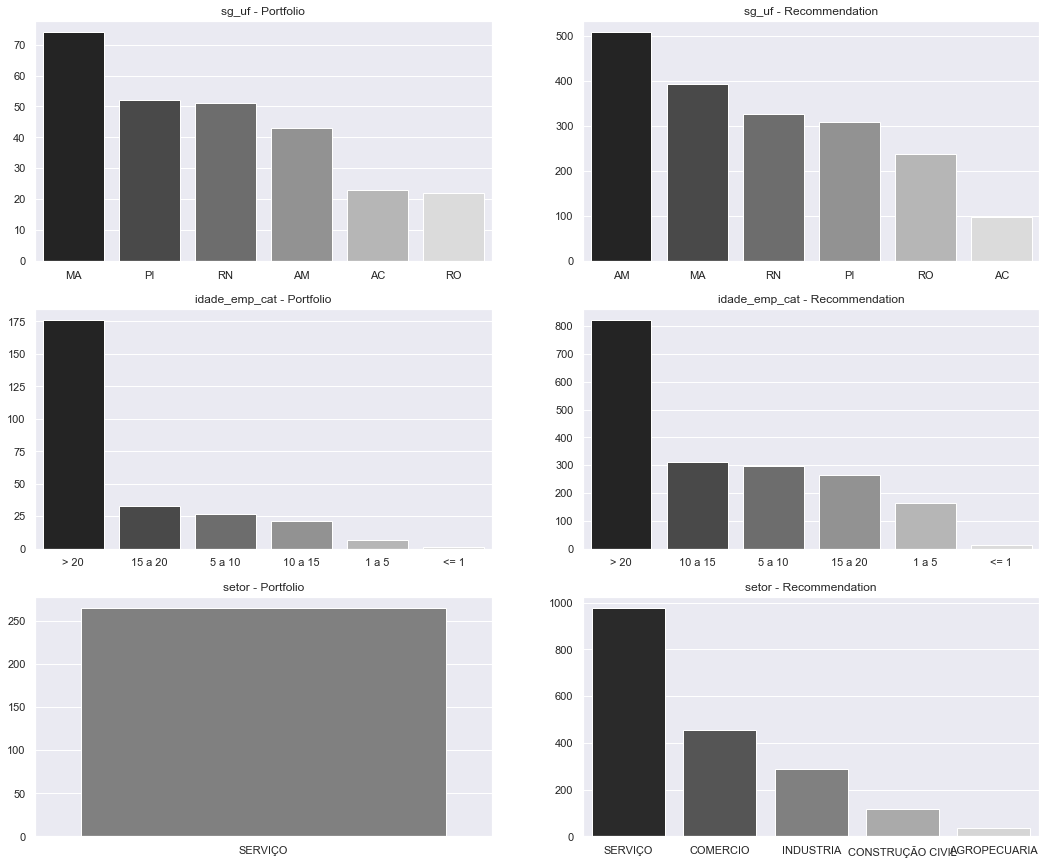

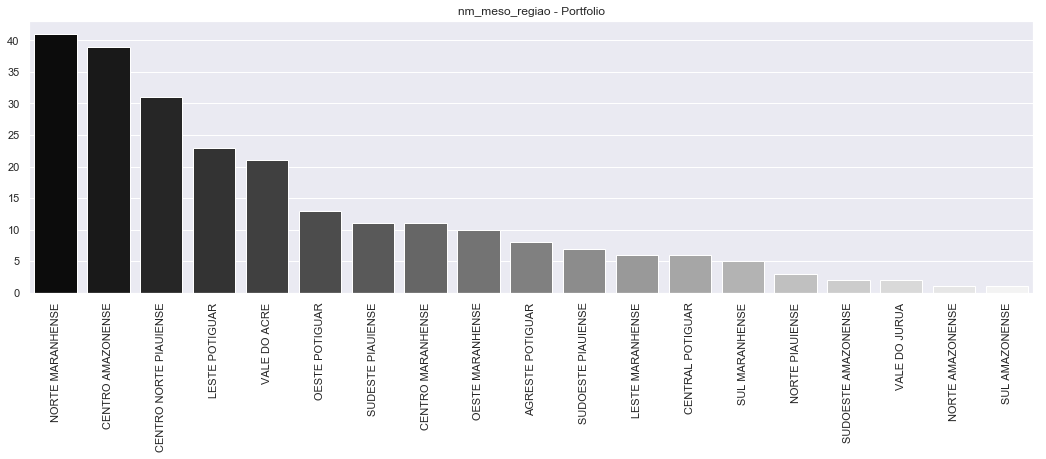

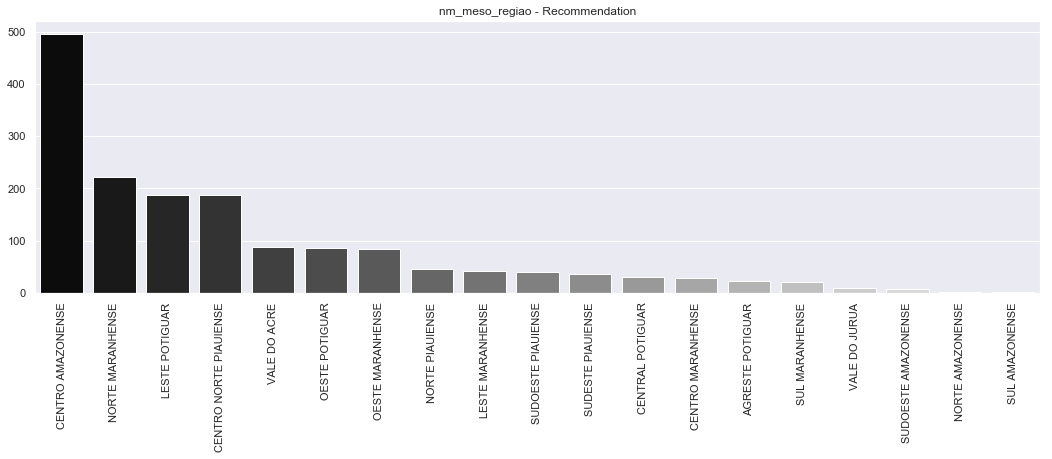

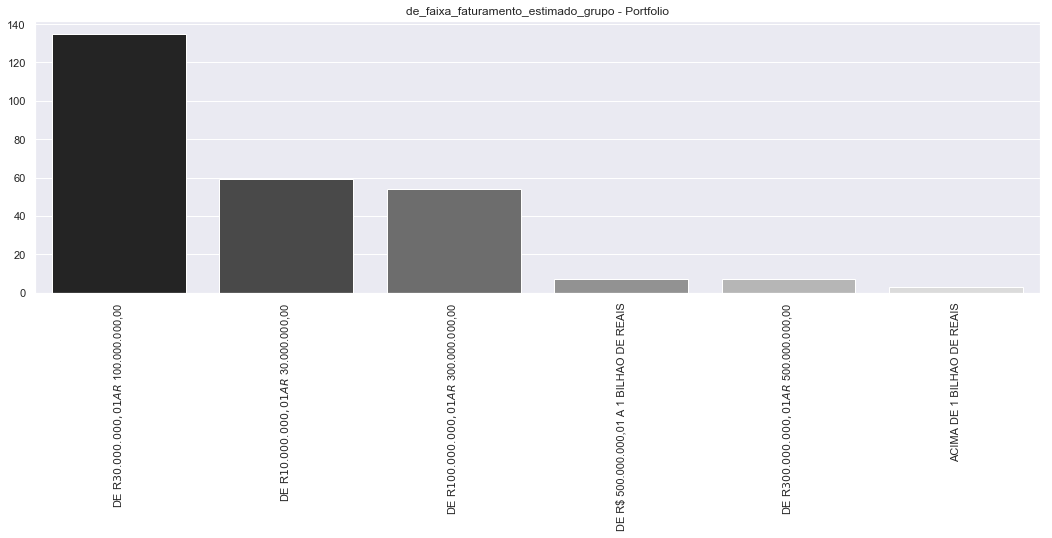

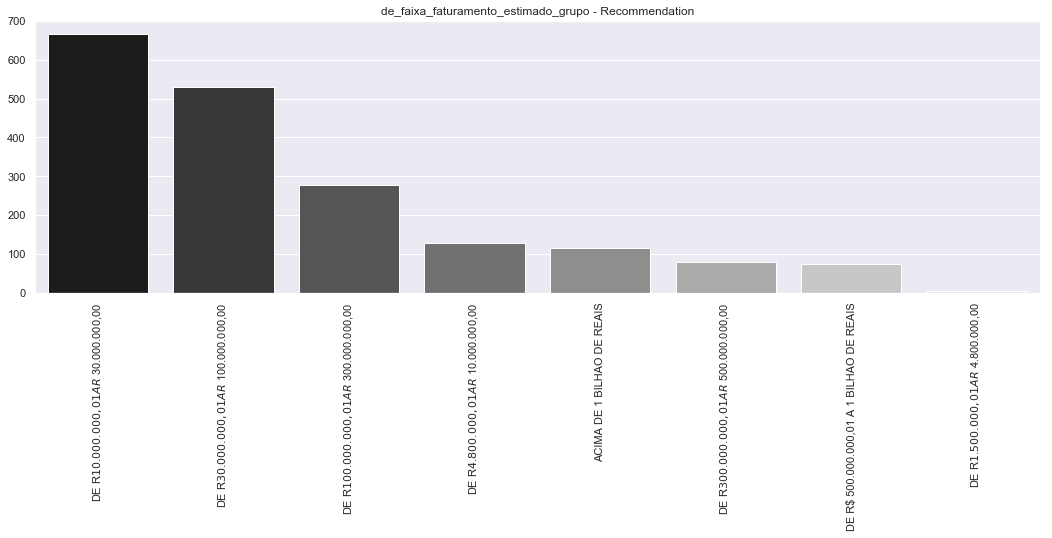

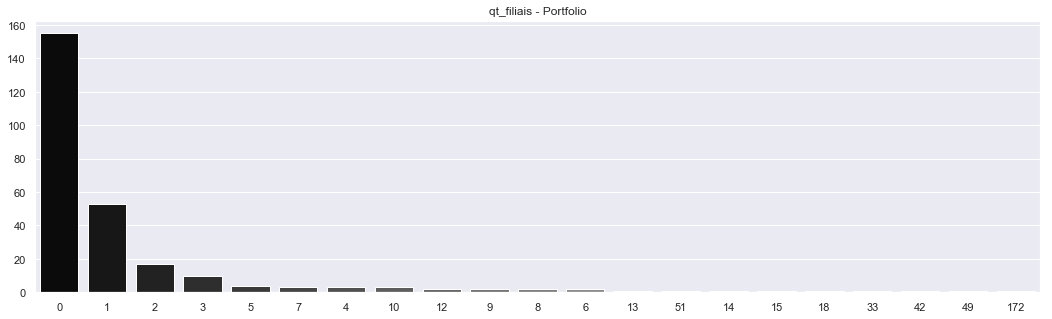

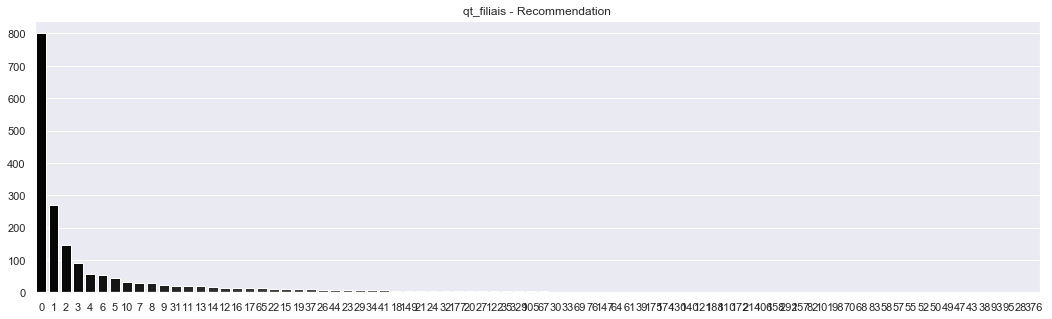

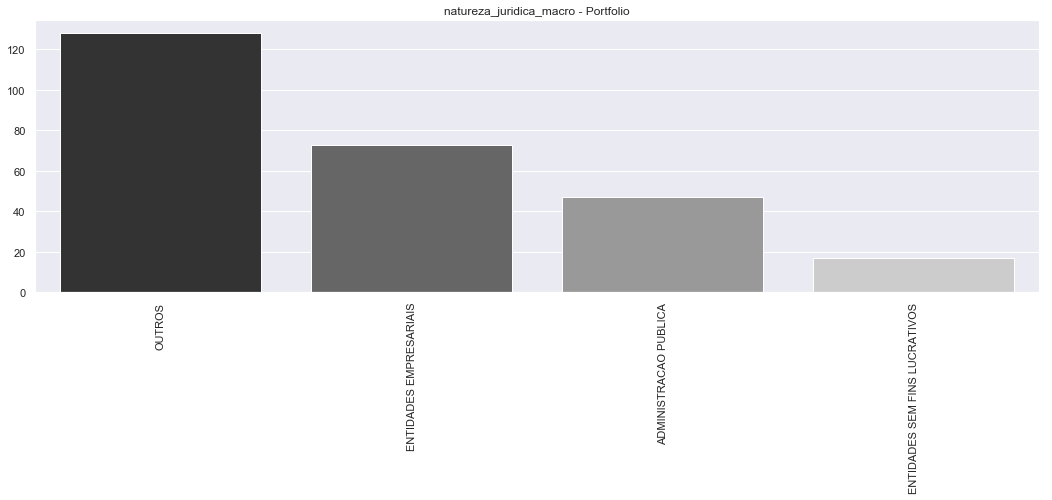

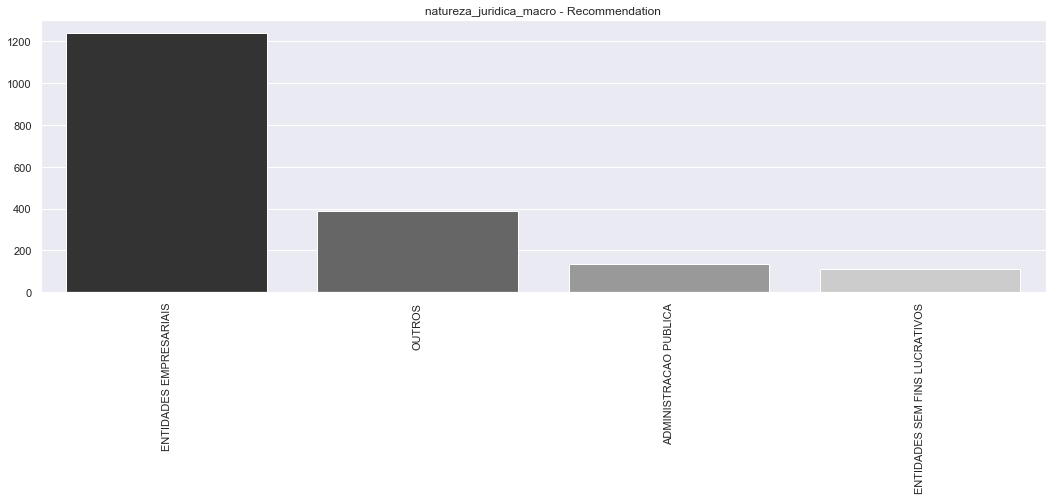

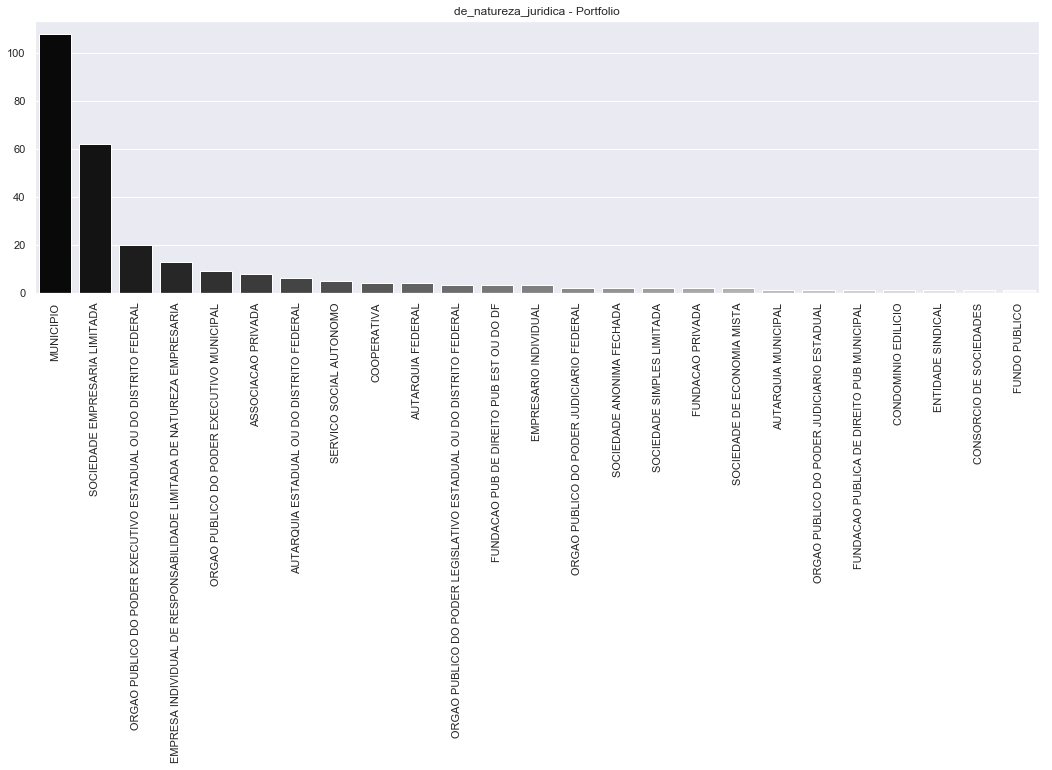

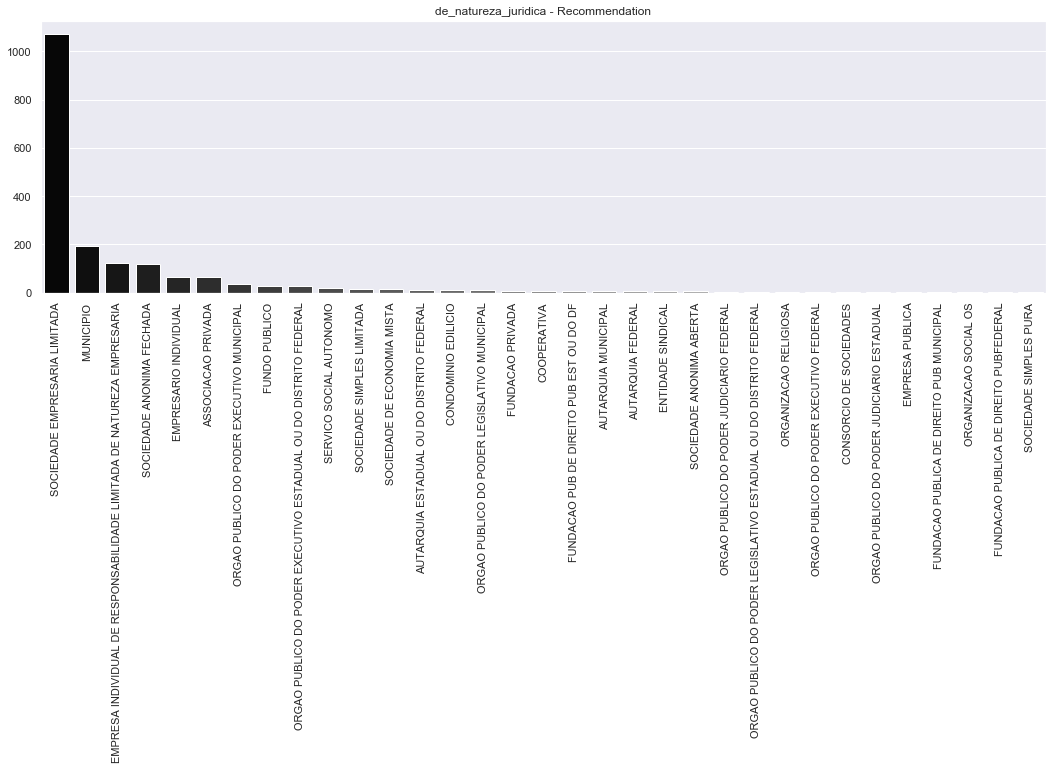

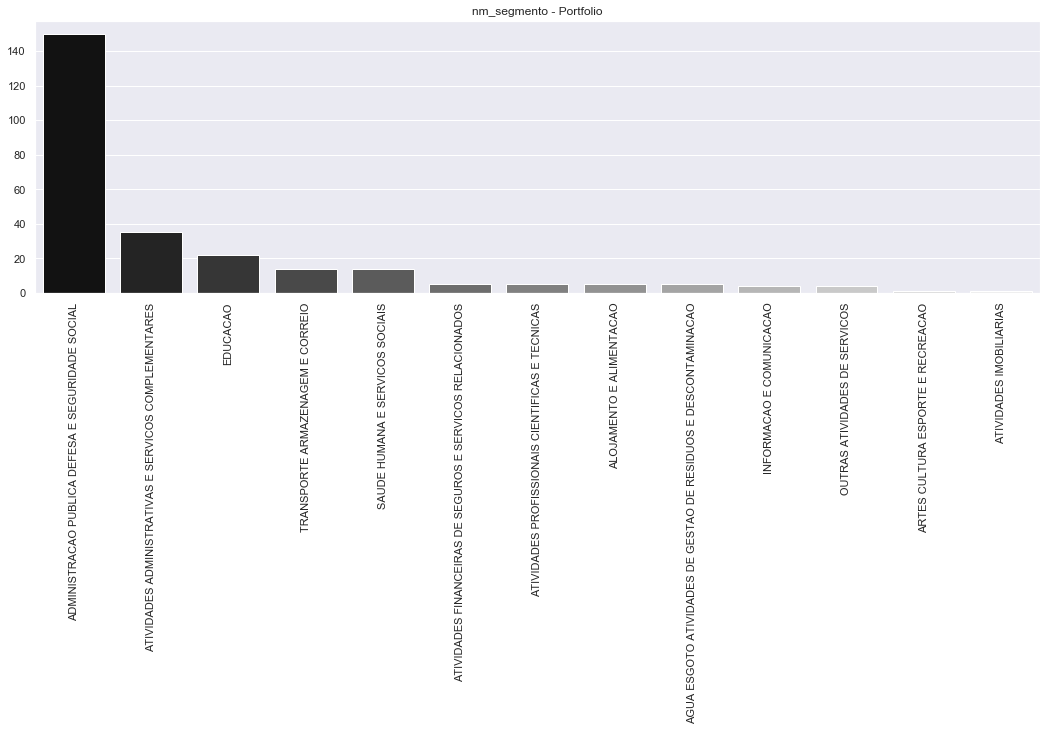

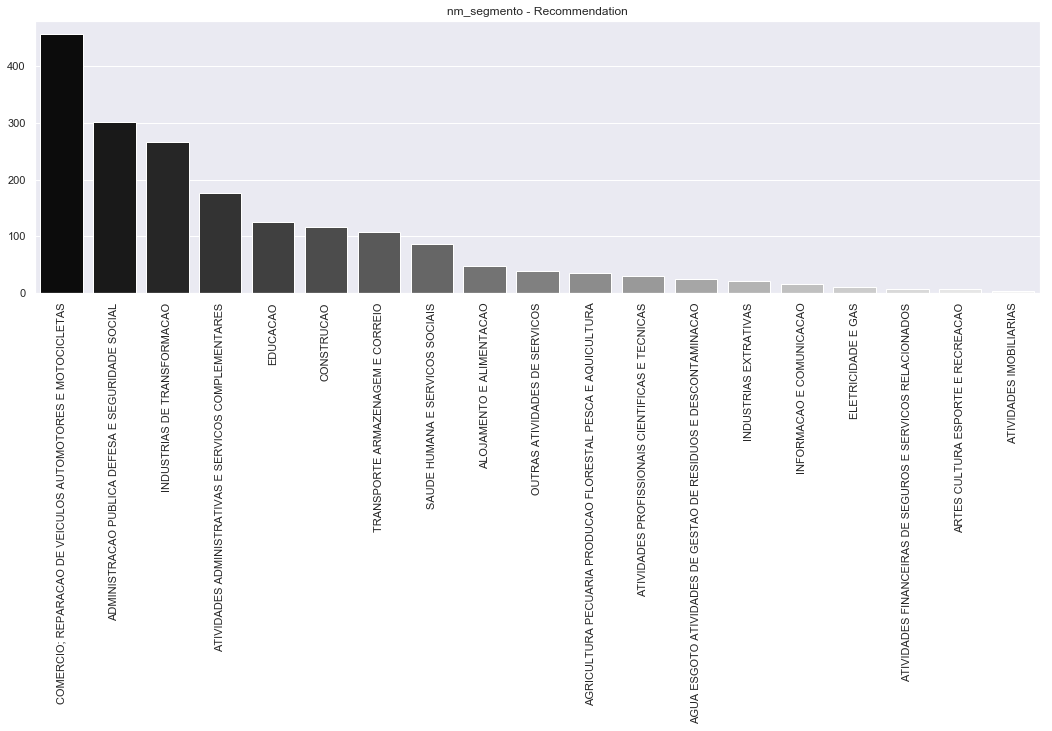

In [56]:
sns.set()
f, axes= plt.subplots(3, 2, figsize=(18, 15))

sns.countplot(data=portfolio_T1, x="sg_uf", palette = 'gist_gray', order = portfolio_T1['sg_uf'].value_counts().index, ax=axes[0,0]);
axes[0,0].set_title("sg_uf - Portfolio")
axes[0,0].set_ylabel("")
axes[0,0].set_xlabel("")

sns.countplot(data=recommendation_full, x="sg_uf", palette = 'gist_gray', order = recommendation_full['sg_uf'].value_counts().index, ax=axes[0,1]);
axes[0,1].set_title("sg_uf - Recommendation")
axes[0,1].set_ylabel("")
axes[0,1].set_xlabel("")

sns.countplot(data=portfolio_T1, x="idade_emp_cat", palette = 'gist_gray', order = portfolio_T1['idade_emp_cat'].value_counts().index, ax=axes[1,0]);
axes[1,0].set_title("idade_emp_cat - Portfolio")
plt.xticks(rotation=90)
axes[1,0].set_ylabel("")
axes[1,0].set_xlabel("")

sns.countplot(data=recommendation_full, x="idade_emp_cat", palette = 'gist_gray', order = recommendation_full['idade_emp_cat'].value_counts().index, ax=axes[1,1]);
axes[1,1].set_title("idade_emp_cat - Recommendation")
axes[1,1].set_ylabel("")
axes[1,1].set_xlabel("")


sns.countplot(data=portfolio_T1, x="setor", palette = 'gist_gray', order = portfolio_T1['setor'].value_counts().index, ax=axes[2,0]);
axes[2,0].set_title("setor - Portfolio")

axes[2,0].set_ylabel("")
axes[2,0].set_xlabel("")

sns.countplot(data=recommendation_full, x="setor", palette = 'gist_gray', order = recommendation_full['setor'].value_counts().index, ax=axes[2,1]);
axes[2,1].set_title("setor - Recommendation")
plt.xticks(rotation=0)
axes[2,1].set_ylabel("")
axes[2,1].set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_T1, x="nm_meso_regiao", palette = 'gist_gray', order = portfolio_T1['nm_meso_regiao'].value_counts().index);
ax.set_title("nm_meso_regiao - Portfolio")
plt.xticks(rotation=90)
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=recommendation_full, x="nm_meso_regiao", palette = 'gist_gray', order = recommendation_full['nm_meso_regiao'].value_counts().index);
ax.set_title("nm_meso_regiao - Recommendation")
plt.xticks(rotation=90)
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_T1, x="de_faixa_faturamento_estimado_grupo", palette = 'gist_gray', order = portfolio_T1['de_faixa_faturamento_estimado_grupo'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("de_faixa_faturamento_estimado_grupo - Portfolio")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=recommendation_full, x="de_faixa_faturamento_estimado_grupo", palette = 'gist_gray', order = recommendation_full['de_faixa_faturamento_estimado_grupo'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("de_faixa_faturamento_estimado_grupo - Recommendation")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_T1, x="qt_filiais", palette = 'gist_gray', order = portfolio_T1['qt_filiais'].value_counts().index);
ax.set_title("qt_filiais - Portfolio")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=recommendation_full, x="qt_filiais", palette = 'gist_gray', order = recommendation_full['qt_filiais'].value_counts().index);
ax.set_title("qt_filiais - Recommendation")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_T1, x="natureza_juridica_macro", palette = 'gist_gray', order = portfolio_T1['natureza_juridica_macro'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("natureza_juridica_macro - Portfolio")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=recommendation_full, x="natureza_juridica_macro", palette = 'gist_gray', order = recommendation_full['natureza_juridica_macro'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("natureza_juridica_macro - Recommendation")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_T1, x="de_natureza_juridica", palette = 'gist_gray', order = portfolio_T1['de_natureza_juridica'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("de_natureza_juridica - Portfolio")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=recommendation_full, x="de_natureza_juridica", palette = 'gist_gray', order = recommendation_full['de_natureza_juridica'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("de_natureza_juridica - Recommendation")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_T1, x="nm_segmento", palette = 'gist_gray', order = portfolio_T1['nm_segmento'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("nm_segmento - Portfolio")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=recommendation_full, x="nm_segmento", palette = 'gist_gray', order = recommendation_full['nm_segmento'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("nm_segmento - Recommendation")
ax.set_ylabel("")
ax.set_xlabel("")
plt.show()


### Verify similar features values:

In [57]:
boolean_values = [True, False]
# Verify similarity between recommendation full values and portfolio values
similar_features_rf = pd.DataFrame(index = boolean_values)
similar_features_rf['idade_empresa_anos'] = recommendation_full['idade_empresa_anos'].between(portfolio_T1['idade_empresa_anos'].min(), portfolio_T1['idade_empresa_anos'].max(), inclusive=True).value_counts()
similar_features_rf['idade_emp_cat'] = recommendation_full['idade_emp_cat'].isin((portfolio_T1['idade_emp_cat'].unique())).value_counts()
similar_features_rf['de_natureza_juridica'] = recommendation_full['de_natureza_juridica'].isin((portfolio_T1['de_natureza_juridica'].unique())).value_counts()
similar_features_rf['sg_uf'] = recommendation_full['sg_uf'].isin((portfolio_T1['sg_uf'].unique())).value_counts()
similar_features_rf['natureza_juridica_macro'] = recommendation_full['natureza_juridica_macro'].isin((portfolio_T1['natureza_juridica_macro'].unique())).value_counts()
similar_features_rf['de_ramo'] = recommendation_full['de_ramo'].isin((portfolio_T1['de_ramo'].unique())).value_counts()
similar_features_rf['fl_rm'] = recommendation_full['fl_rm'].isin((portfolio_T1['fl_rm'].unique())).value_counts()
similar_features_rf['fl_matriz'] = recommendation_full['fl_matriz'].isin((portfolio_T1['fl_matriz'].unique())).value_counts()
similar_features_rf['fl_me'] = recommendation_full['fl_me'].isin((portfolio_T1['fl_me'].unique())).value_counts()
similar_features_rf['fl_sa'] = recommendation_full['fl_sa'].isin((portfolio_T1['fl_sa'].unique())).value_counts()
similar_features_rf['fl_epp'] = recommendation_full['fl_epp'].isin((portfolio_T1['fl_epp'].unique())).value_counts()
similar_features_rf['fl_mei'] = recommendation_full['fl_mei'].isin((portfolio_T1['fl_mei'].unique())).value_counts()
similar_features_rf['fl_ltda'] = recommendation_full['fl_ltda'].isin((portfolio_T1['fl_ltda'].unique())).value_counts()
similar_features_rf['fl_st_especial'] = recommendation_full['fl_st_especial'].isin((portfolio_T1['fl_st_especial'].unique())).value_counts()
similar_features_rf['fl_email'] = recommendation_full['fl_mei'].isin((portfolio_T1['fl_email'].unique())).value_counts()
similar_features_rf['fl_telefone'] = recommendation_full['fl_telefone'].isin((portfolio_T1['fl_telefone'].unique())).value_counts()
similar_features_rf['nm_segmento'] = recommendation_full['nm_segmento'].isin((portfolio_T1['nm_segmento'].unique())).value_counts()
similar_features_rf['nm_meso_regiao'] = recommendation_full['nm_meso_regiao'].isin((portfolio_T1['nm_meso_regiao'].unique())).value_counts()
similar_features_rf['de_faixa_faturamento_estimado_grupo'] = recommendation_full['de_faixa_faturamento_estimado_grupo'].isin((portfolio_T1['de_faixa_faturamento_estimado_grupo'].unique())).value_counts()
similar_features_rf['qt_filiais'] = recommendation_full['qt_filiais'].between(portfolio_T1['qt_filiais'].min(), portfolio_T1['qt_filiais'].max(), inclusive=True).value_counts()
similar_features_rf = similar_features_rf.fillna('0')
similar_features_rf

,idade_empresa_anos,idade_emp_cat,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,fl_rm,fl_matriz,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,nm_segmento,nm_meso_regiao,de_faixa_faturamento_estimado_grupo,qt_filiais
True,1847,1873,1849,1873,1873,968,1873,1466,1863,1873,1873,1873,1873,1871,1873,1873,968,1873,1739,1860
False,26,0,24,0,0,905,0,407,10,0,0,0,0,2,0,0,905,0,134,13


In [58]:
# Verify similarity between recommendation top 25 values and portfolio values
similar_features_r_tp25 = pd.DataFrame(index = boolean_values)
similar_features_r_tp25['idade_empresa_anos'] = Top25_recommendations['idade_empresa_anos'].between(portfolio_T1['idade_empresa_anos'].min(), portfolio_T1['idade_empresa_anos'].max(), inclusive=True).value_counts()
similar_features_r_tp25['idade_emp_cat'] = Top25_recommendations['idade_emp_cat'].isin((portfolio_T1['idade_emp_cat'].unique())).value_counts()
similar_features_r_tp25['de_natureza_juridica'] = Top25_recommendations['de_natureza_juridica'].isin((portfolio_T1['de_natureza_juridica'].unique())).value_counts()
similar_features_r_tp25['sg_uf'] = Top25_recommendations['sg_uf'].isin((portfolio_T1['sg_uf'].unique())).value_counts()
similar_features_r_tp25['natureza_juridica_macro'] = Top25_recommendations['natureza_juridica_macro'].isin((portfolio_T1['natureza_juridica_macro'].unique())).value_counts()
similar_features_r_tp25['de_ramo'] = Top25_recommendations['de_ramo'].isin((portfolio_T1['de_ramo'].unique())).value_counts()
similar_features_r_tp25['fl_rm'] = Top25_recommendations['fl_rm'].isin((portfolio_T1['fl_rm'].unique())).value_counts()
similar_features_r_tp25['fl_matriz'] = Top25_recommendations['fl_matriz'].isin((portfolio_T1['fl_matriz'].unique())).value_counts()
similar_features_r_tp25['fl_me'] = Top25_recommendations['fl_me'].isin((portfolio_T1['fl_me'].unique())).value_counts()
similar_features_r_tp25['fl_sa'] = Top25_recommendations['fl_sa'].isin((portfolio_T1['fl_sa'].unique())).value_counts()
similar_features_r_tp25['fl_epp'] = Top25_recommendations['fl_epp'].isin((portfolio_T1['fl_epp'].unique())).value_counts()
similar_features_r_tp25['fl_mei'] = Top25_recommendations['fl_mei'].isin((portfolio_T1['fl_mei'].unique())).value_counts()
similar_features_r_tp25['fl_ltda'] = Top25_recommendations['fl_ltda'].isin((portfolio_T1['fl_ltda'].unique())).value_counts()
similar_features_r_tp25['fl_st_especial'] = Top25_recommendations['fl_st_especial'].isin((portfolio_T1['fl_st_especial'].unique())).value_counts()
similar_features_r_tp25['fl_email'] = Top25_recommendations['fl_mei'].isin((portfolio_T1['fl_email'].unique())).value_counts()
similar_features_r_tp25['fl_telefone'] = Top25_recommendations['fl_telefone'].isin((portfolio_T1['fl_telefone'].unique())).value_counts()
similar_features_r_tp25['nm_segmento'] = Top25_recommendations['nm_segmento'].isin((portfolio_T1['nm_segmento'].unique())).value_counts()
similar_features_r_tp25['nm_meso_regiao'] = Top25_recommendations['nm_meso_regiao'].isin((portfolio_T1['nm_meso_regiao'].unique())).value_counts()
similar_features_r_tp25['de_faixa_faturamento_estimado_grupo'] = Top25_recommendations['de_faixa_faturamento_estimado_grupo'].isin((portfolio_T1['de_faixa_faturamento_estimado_grupo'].unique())).value_counts()
similar_features_r_tp25['qt_filiais'] = Top25_recommendations['qt_filiais'].between(portfolio_T1['qt_filiais'].min(), portfolio_T1['qt_filiais'].max(), inclusive=True).value_counts()
similar_features_r_tp25 = similar_features_r_tp25.fillna('0')
similar_features_r_tp25

,idade_empresa_anos,idade_emp_cat,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,fl_rm,fl_matriz,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_email,fl_telefone,nm_segmento,nm_meso_regiao,de_faixa_faturamento_estimado_grupo,qt_filiais
True,25,25,24,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,24,25
False,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


***
> ***
***
## Extras: 

### Recomendation filtered by portfolio values:

In [59]:
# Filter recommendation
recommendation_full_filtered = pd.DataFrame()
recommendation_full_filtered = recommendation_full[recommendation_full['de_natureza_juridica'].isin(portfolio_T1['de_natureza_juridica'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['sg_uf'].isin(portfolio_T1['sg_uf'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['natureza_juridica_macro'].isin(portfolio_T1['natureza_juridica_macro'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['de_ramo'].isin(portfolio_T1['de_ramo'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['idade_emp_cat'].isin(portfolio_T1['idade_emp_cat'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['fl_rm'].isin(portfolio_T1['fl_rm'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['fl_matriz'].isin(portfolio_T1['fl_matriz'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['fl_me'].isin(portfolio_T1['fl_me'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['fl_sa'].isin(portfolio_T1['fl_sa'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['fl_epp'].isin(portfolio_T1['fl_epp'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['fl_mei'].isin(portfolio_T1['fl_mei'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['fl_ltda'].isin(portfolio_T1['fl_ltda'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['fl_st_especial'].isin(portfolio_T1['fl_st_especial'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['fl_email'].isin(portfolio_T1['fl_email'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['fl_telefone'].isin(portfolio_T1['fl_telefone'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['qt_filiais'].between(portfolio_T1['qt_filiais'].min(), portfolio_T1['qt_filiais'].max(), inclusive=True) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['idade_empresa_anos'].between(portfolio_T1['idade_empresa_anos'].min(), portfolio_T1['idade_empresa_anos'].max(), inclusive=True) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['nm_segmento'].isin(portfolio_T1['nm_segmento'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['nm_meso_regiao'].isin(portfolio_T1['nm_meso_regiao'].unique()) == True]
recommendation_full_filtered = recommendation_full_filtered[recommendation_full_filtered['de_faixa_faturamento_estimado_grupo'].isin(portfolio_T1['de_faixa_faturamento_estimado'].unique()) == True]
recommendation_full_filtered.head(3)

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,...,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais,id_num,cliente_atual,pred_1,pred_2,pred_3,predict_sum,dist_centroid,dist_centroid_norm
0,7d7b7f1a10a4a13abcf84fc563f0702c87a6605bca7ae4a64e13b9c0825e5f6c,True,MUNICIPIO,MA,OUTROS,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,21.835616,> 20,False,False,False,False,False,2003-10-04,False,False,False,NAO,ADMINIS

In [60]:
# Companies in recommendation_full after filter
recommendation_full_filtered.shape[0]

722

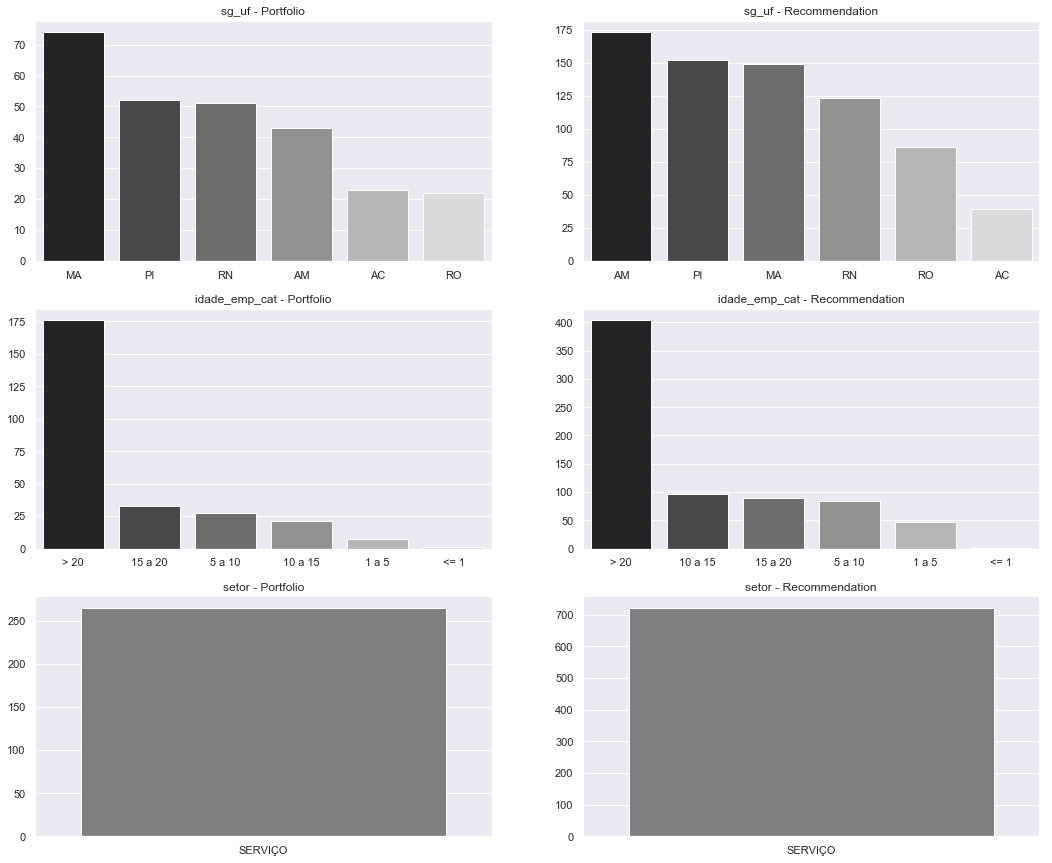

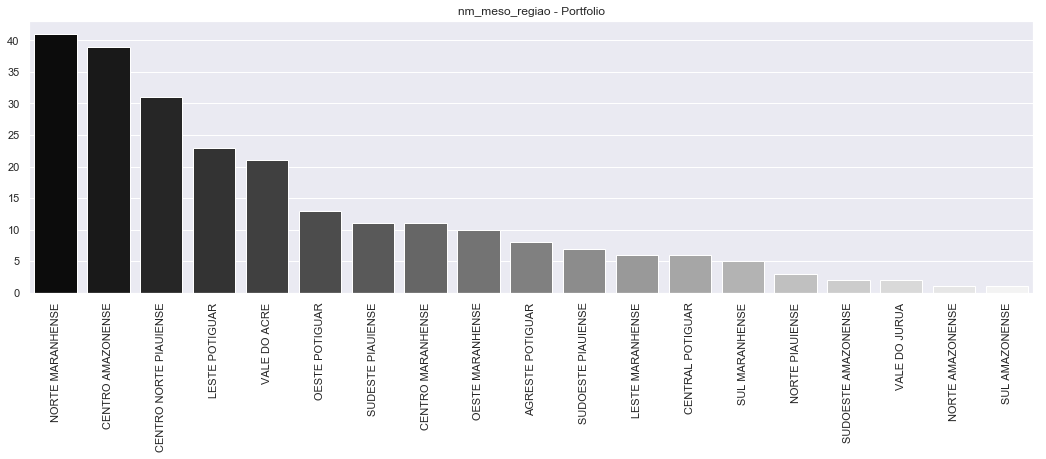

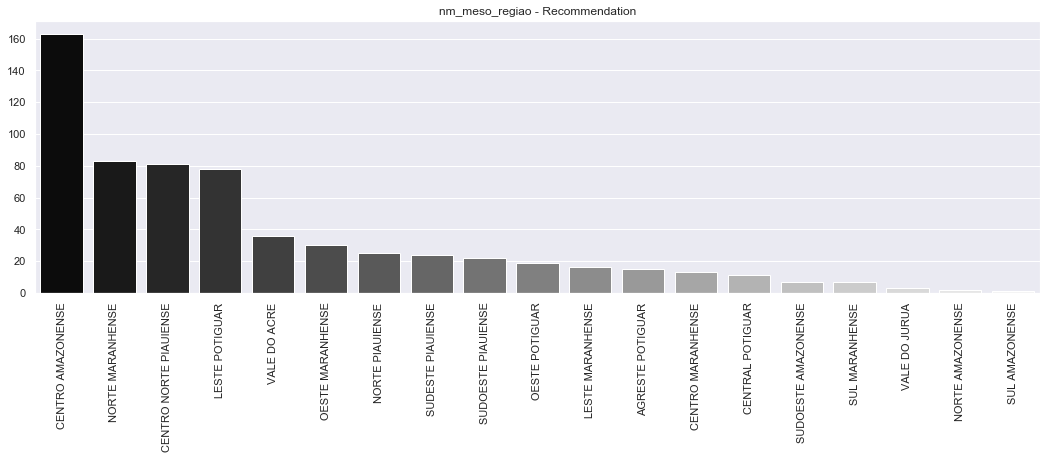

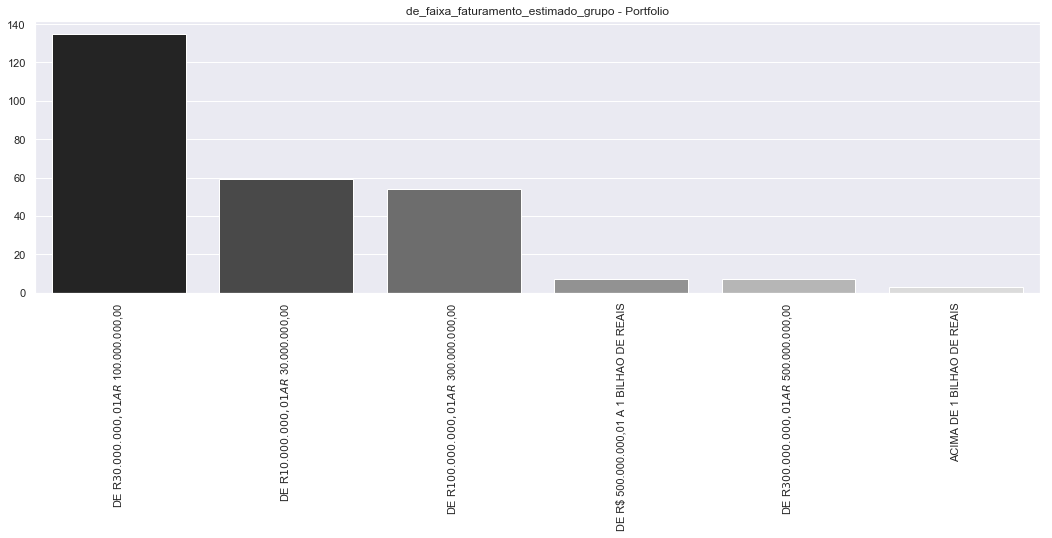

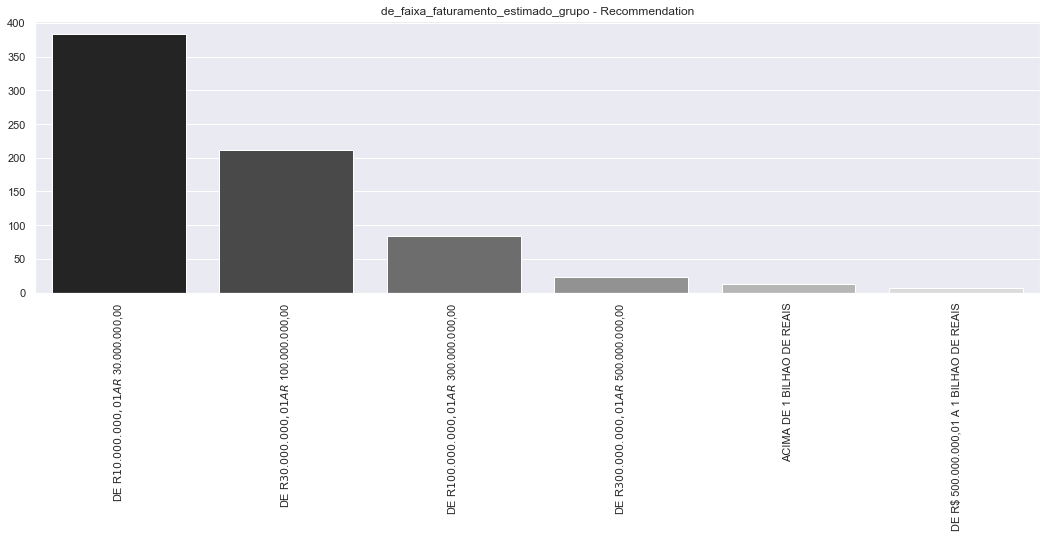

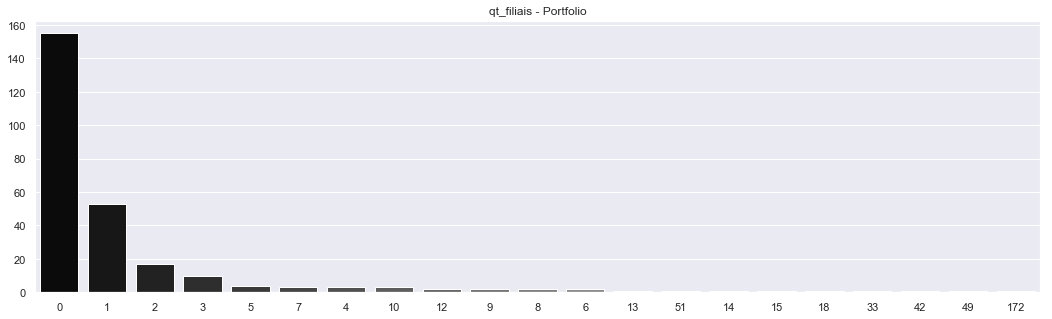

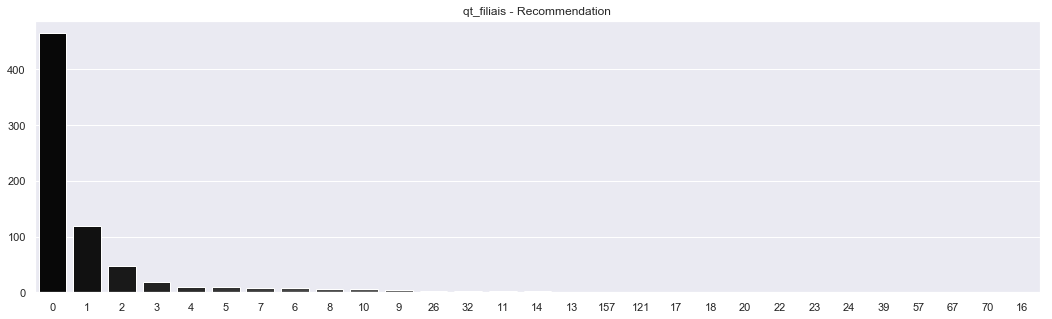

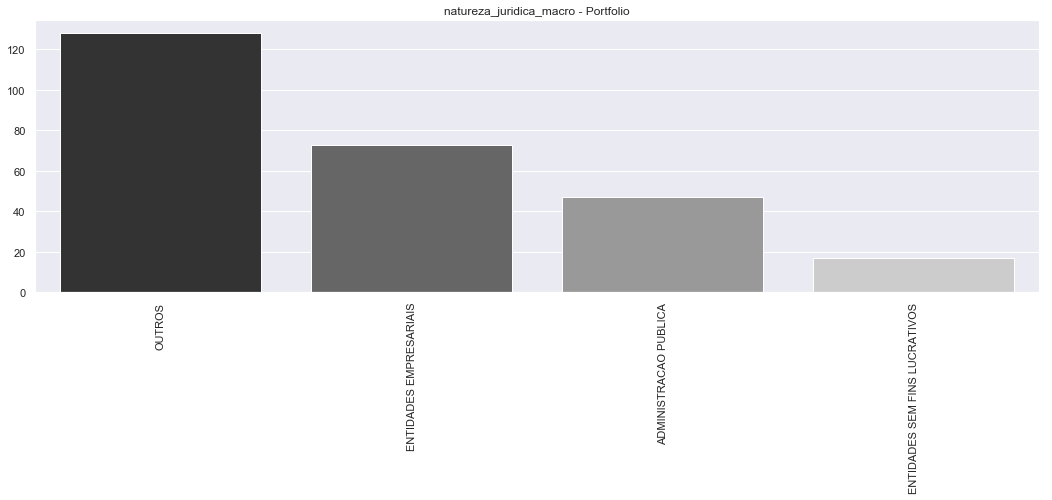

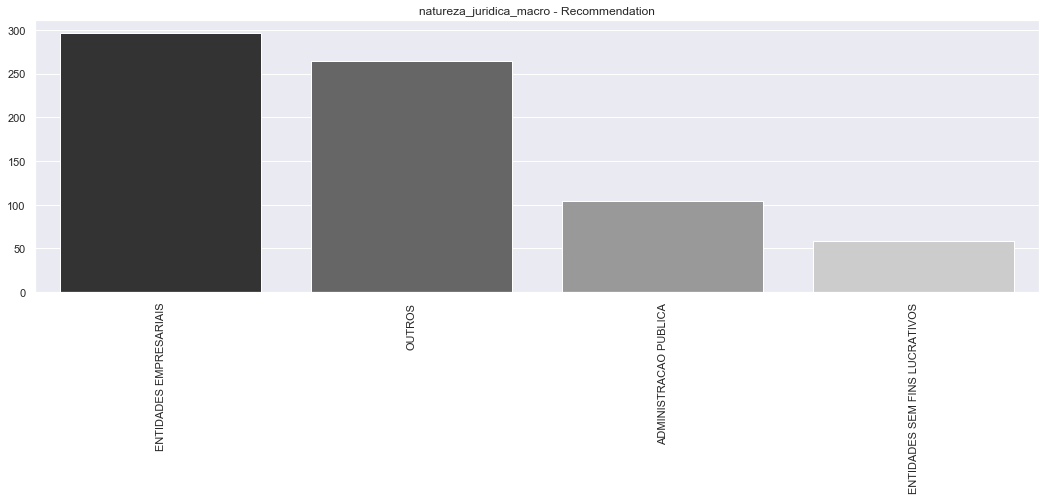

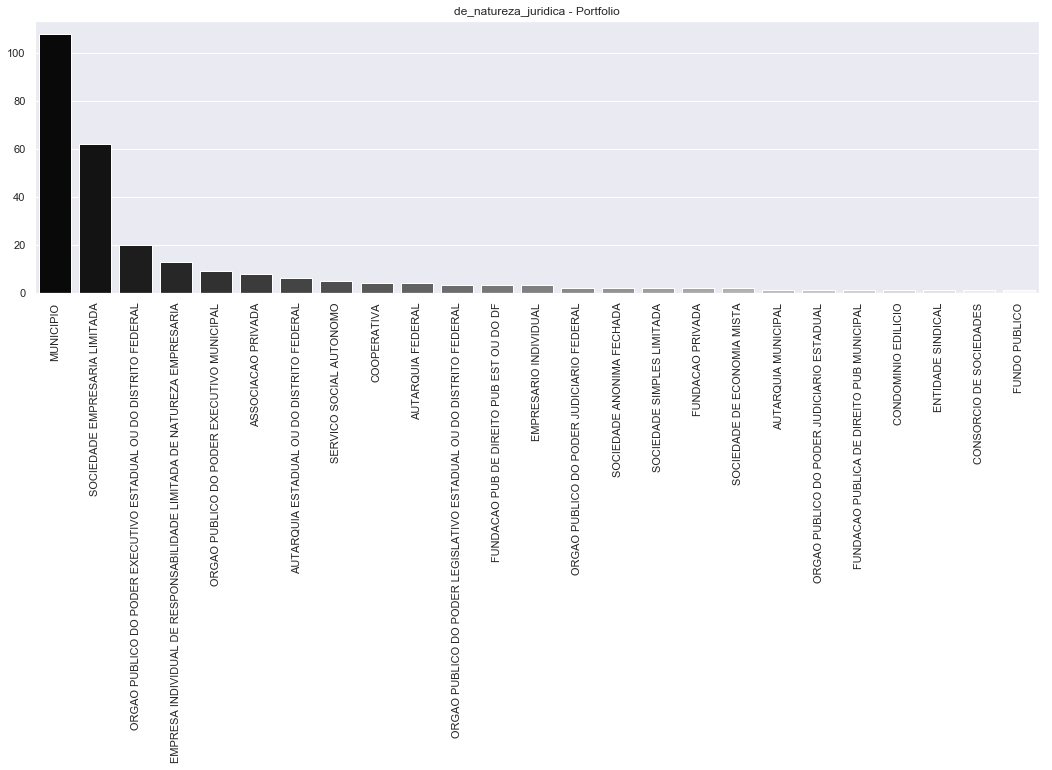

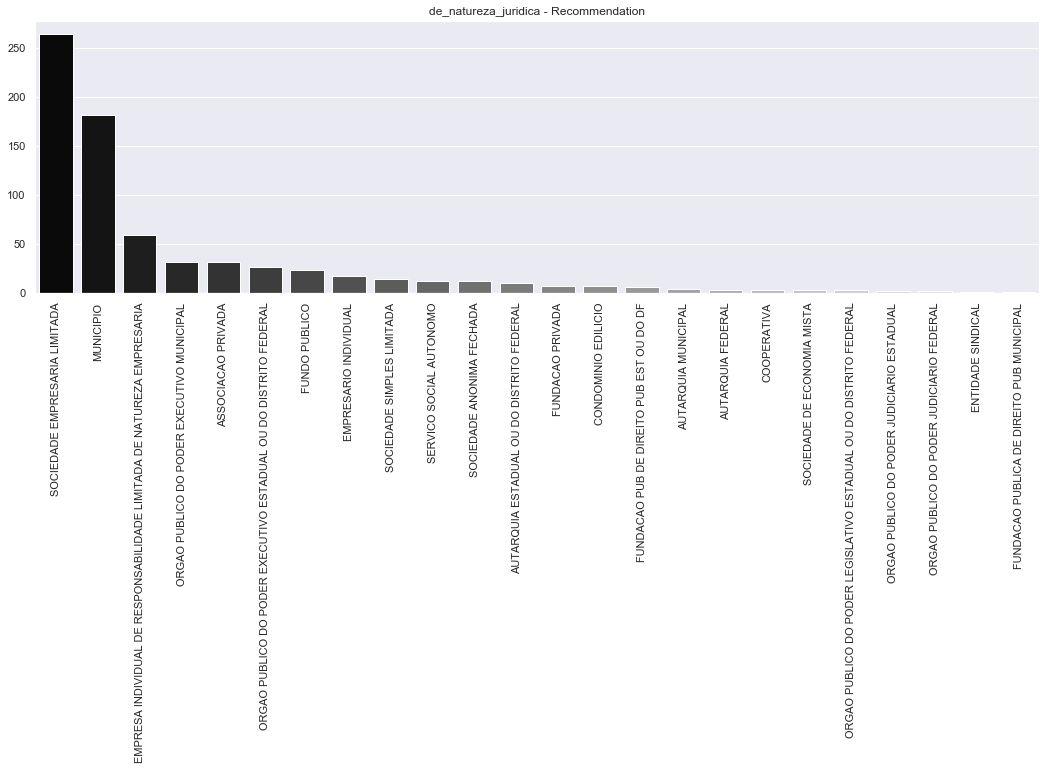

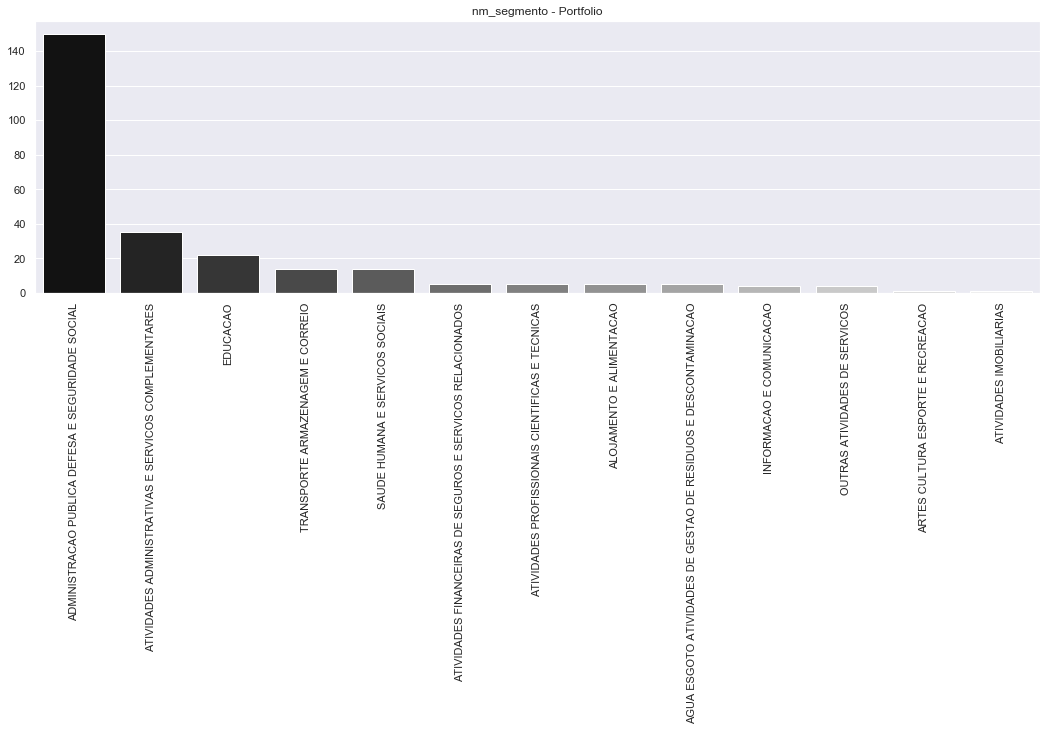

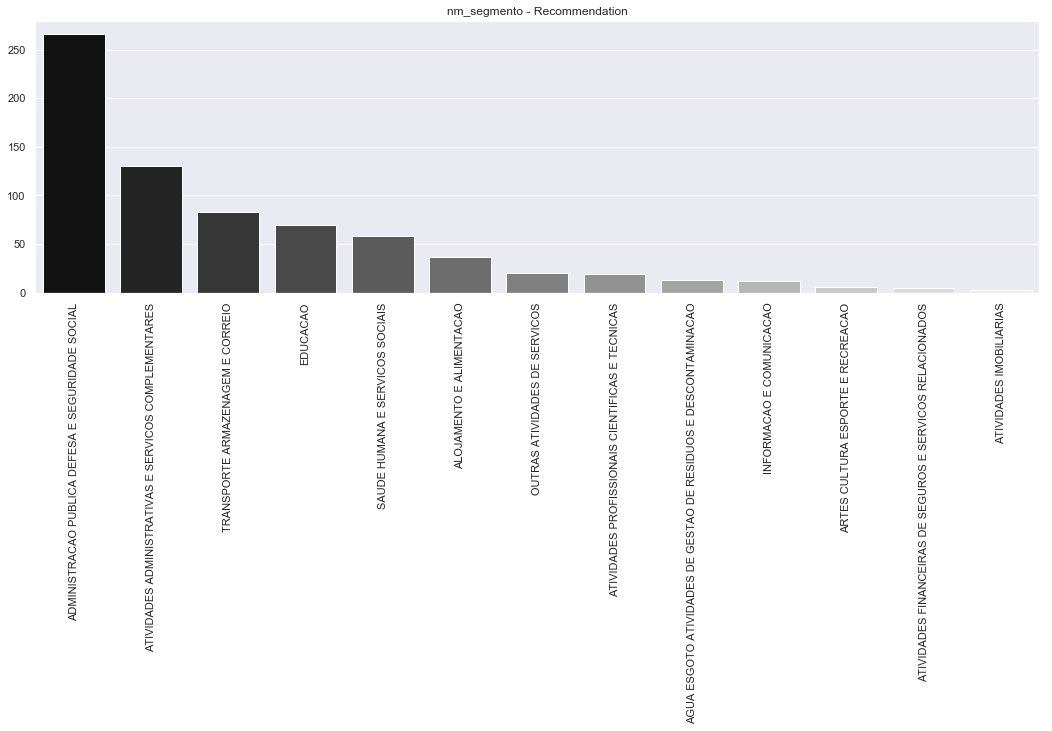

In [61]:
# Graphs:
sns.set()
f, axes= plt.subplots(3, 2, figsize=(18, 15))

sns.countplot(data=portfolio_T1, x="sg_uf", palette = 'gist_gray', order = portfolio_T1['sg_uf'].value_counts().index, ax=axes[0,0]);
axes[0,0].set_title("sg_uf - Portfolio")
axes[0,0].set_ylabel("")
axes[0,0].set_xlabel("")

sns.countplot(data=recommendation_full_filtered, x="sg_uf", palette = 'gist_gray', order = recommendation_full_filtered['sg_uf'].value_counts().index, ax=axes[0,1]);
axes[0,1].set_title("sg_uf - Recommendation")
axes[0,1].set_ylabel("")
axes[0,1].set_xlabel("")

sns.countplot(data=portfolio_T1, x="idade_emp_cat", palette = 'gist_gray', order = portfolio_T1['idade_emp_cat'].value_counts().index, ax=axes[1,0]);
axes[1,0].set_title("idade_emp_cat - Portfolio")
plt.xticks(rotation=90)
axes[1,0].set_ylabel("")
axes[1,0].set_xlabel("")

sns.countplot(data=recommendation_full_filtered, x="idade_emp_cat", palette = 'gist_gray', order = recommendation_full_filtered['idade_emp_cat'].value_counts().index, ax=axes[1,1]);
axes[1,1].set_title("idade_emp_cat - Recommendation")
axes[1,1].set_ylabel("")
axes[1,1].set_xlabel("")


sns.countplot(data=portfolio_T1, x="setor", palette = 'gist_gray', order = portfolio_T1['setor'].value_counts().index, ax=axes[2,0]);
axes[2,0].set_title("setor - Portfolio")

axes[2,0].set_ylabel("")
axes[2,0].set_xlabel("")

sns.countplot(data=recommendation_full_filtered, x="setor", palette = 'gist_gray', order = recommendation_full_filtered['setor'].value_counts().index, ax=axes[2,1]);
axes[2,1].set_title("setor - Recommendation")
plt.xticks(rotation=0)
axes[2,1].set_ylabel("")
axes[2,1].set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_T1, x="nm_meso_regiao", palette = 'gist_gray', order = portfolio_T1['nm_meso_regiao'].value_counts().index);
ax.set_title("nm_meso_regiao - Portfolio")
plt.xticks(rotation=90)
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=recommendation_full_filtered, x="nm_meso_regiao", palette = 'gist_gray', order = recommendation_full_filtered['nm_meso_regiao'].value_counts().index);
ax.set_title("nm_meso_regiao - Recommendation")
plt.xticks(rotation=90)
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_T1, x="de_faixa_faturamento_estimado_grupo", palette = 'gist_gray', order = portfolio_T1['de_faixa_faturamento_estimado_grupo'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("de_faixa_faturamento_estimado_grupo - Portfolio")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=recommendation_full_filtered, x="de_faixa_faturamento_estimado_grupo", palette = 'gist_gray', order = recommendation_full_filtered['de_faixa_faturamento_estimado_grupo'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("de_faixa_faturamento_estimado_grupo - Recommendation")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_T1, x="qt_filiais", palette = 'gist_gray', order = portfolio_T1['qt_filiais'].value_counts().index);
ax.set_title("qt_filiais - Portfolio")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=recommendation_full_filtered, x="qt_filiais", palette = 'gist_gray', order = recommendation_full_filtered['qt_filiais'].value_counts().index);
ax.set_title("qt_filiais - Recommendation")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_T1, x="natureza_juridica_macro", palette = 'gist_gray', order = portfolio_T1['natureza_juridica_macro'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("natureza_juridica_macro - Portfolio")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=recommendation_full_filtered, x="natureza_juridica_macro", palette = 'gist_gray', order = recommendation_full_filtered['natureza_juridica_macro'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("natureza_juridica_macro - Recommendation")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_T1, x="de_natureza_juridica", palette = 'gist_gray', order = portfolio_T1['de_natureza_juridica'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("de_natureza_juridica - Portfolio")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=recommendation_full_filtered, x="de_natureza_juridica", palette = 'gist_gray', order = recommendation_full_filtered['de_natureza_juridica'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("de_natureza_juridica - Recommendation")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=portfolio_T1, x="nm_segmento", palette = 'gist_gray', order = portfolio_T1['nm_segmento'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("nm_segmento - Portfolio")
ax.set_ylabel("")
ax.set_xlabel("")

fig, ax = plt.subplots(figsize=(18,5))
sns.countplot(data=recommendation_full_filtered, x="nm_segmento", palette = 'gist_gray', order = recommendation_full_filtered['nm_segmento'].value_counts().index);
plt.xticks(rotation=90)
ax.set_title("nm_segmento - Recommendation")
ax.set_ylabel("")
ax.set_xlabel("")
plt.show()

***
### Companies with tax, legal, financial or operational issues:

In [62]:
# features to check:
dictionary.loc[dictionary['Coluna'].isin(['fl_st_especial', 'fl_simples_irregular', 'de_saude_tributaria', 'de_nivel_atividade'])]

,Coluna,Tipo,Descrição
14,fl_st_especial,boolean value,true if dt_situacao_especial is not null. If it is not null means that some extraordinary situation is identified by the IRS (*ESPOLIO DE EMPRESARIO EMPRESA INDIVIDUAL OU EIRELI | *FALIDO | *EM LIQUIDACAO | *LIQUIDACAO JUDICIAL | *LIQUIDACAO EXTRA JUDICIAL | *REGISTRO NA JUNTA COMERCIAL EM ANDAMENTO | *EM LIQUID EXTRA JUDICIAL | *RECUPERACAO JUDICIAL | *INTERVENCAO*)
36,de_saude_tributaria,character,indicator of health tax status | Green if all tax are OK | Red if none are OK
39,de_nivel_atividade,character,probability of being operating | ALTA high probality | BAIXA | low probality.
41,fl_simples_irregular,boolean,true if the company is taxed under the SIMPLES regime and has a impeditive CNAE (economic activities that are not allowed to be taxed according to the simples regime) revenue above the limit of the regime.


> ### Companies with issues in Portfolio

In [63]:
# fl_st_especial
portfolio_T1['fl_st_especial'].value_counts()

False    265
Name: fl_st_especial, dtype: int64

In [64]:
# fl_simples_irregular
portfolio_T1['fl_simples_irregular'].value_counts()

False    264
True     1  
Name: fl_simples_irregular, dtype: int64

In [65]:
# de_saude_tributaria
portfolio_T1['de_saude_tributaria'].value_counts()

VERDE       159
AZUL        83 
LARANJA     20 
VERMELHO    2  
CINZA       1  
Name: de_saude_tributaria, dtype: int64

In [66]:
# de_nivel_atividade
portfolio_T1['de_nivel_atividade'].value_counts()

ALTA     236
MEDIA    26 
BAIXA    3  
Name: de_nivel_atividade, dtype: int64

In [67]:
# Dataset Portfolio issues: 
portfolio_not_issues = pd.DataFrame()
portfolio_not_issues = portfolio_T1[portfolio_T1['fl_st_especial'] != True]
portfolio_not_issues = portfolio_not_issues[portfolio_not_issues['fl_simples_irregular'] != True]
portfolio_not_issues = portfolio_not_issues[portfolio_not_issues['de_saude_tributaria'] != 'VERMELHO']
portfolio_not_issues = portfolio_not_issues[portfolio_not_issues['de_nivel_atividade'] != 'BAIXA']
portfolio_not_issues = portfolio_not_issues[portfolio_not_issues['de_nivel_atividade'] != 'MUITO BAIXA']
portfolio_issues = pd.DataFrame(portfolio_T1['id'])
portfolio_issues['Tr_exc'] = portfolio_issues['id'].isin(portfolio_not_issues['id'])
portfolio_issues = portfolio_issues[portfolio_issues['Tr_exc'] != True]
portfolio_issues = portfolio_issues.drop(['Tr_exc'], axis = 1)
portfolio_issues = pd.merge(portfolio_issues, market_T1, on='id', how='left')
portfolio_issues.head(3)

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais,id_num
0,e3174d9abd5a195233146f3bef34f058cd80c8aecc6412f64c64829b85a9473f,True,MUNICIPIO,MA,OUTROS,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,21.816438,> 20,False,False,False,Fa

In [68]:
# Companies with problems in portfolio
portfolio_issues.shape[0]

6

> ### Companies with issues in Recomendation_full

In [69]:
# fl_st_especial
recommendation_full['fl_st_especial'].value_counts()

False    1871
True     2   
Name: fl_st_especial, dtype: int64

In [70]:
# fl_simples_irregular
recommendation_full['fl_simples_irregular'].value_counts()

False    1870
True     3   
Name: fl_simples_irregular, dtype: int64

In [71]:
# de_saude_tributaria
recommendation_full['de_saude_tributaria'].value_counts()

VERDE       1234
AZUL        416 
LARANJA     115 
VERMELHO    52  
CINZA       33  
AMARELO     23  
Name: de_saude_tributaria, dtype: int64

In [72]:
# de_nivel_atividade
recommendation_full['de_nivel_atividade'].value_counts()

ALTA     1728
MEDIA    128 
BAIXA    17  
Name: de_nivel_atividade, dtype: int64

In [73]:
# Dataset recommendation_full issues: 
recommendation_full_not_issues = pd.DataFrame()
recommendation_full_not_issues = recommendation_full[recommendation_full['fl_st_especial'] != True]
recommendation_full_not_issues = recommendation_full_not_issues[recommendation_full_not_issues['fl_simples_irregular'] != True]
recommendation_full_not_issues = recommendation_full_not_issues[recommendation_full_not_issues['de_saude_tributaria'] != 'VERMELHO']
recommendation_full_not_issues = recommendation_full_not_issues[recommendation_full_not_issues['de_nivel_atividade'] != 'BAIXA']
recommendation_full_not_issues = recommendation_full_not_issues[recommendation_full_not_issues['de_nivel_atividade'] != 'MUITO BAIXA']
recommendation_full_issues = pd.DataFrame(recommendation_full['id'])
recommendation_full_issues['Tr_exc'] = recommendation_full_issues['id'].isin(recommendation_full_not_issues['id'])
recommendation_full_issues = recommendation_full_issues[recommendation_full_issues['Tr_exc'] != True]
recommendation_full_issues = recommendation_full_issues.drop(['Tr_exc'], axis = 1)
recommendation_full_issues = pd.merge(recommendation_full_issues, market_T1, on='id', how='left')
recommendation_full_issues.head(3)

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais,id_num
0,f507eb3d15d131d42bed7bce9f05d8c734ed64a58774f5d40e880a95fcd3d8e8,True,MUNICIPIO,RN,OUTROS,"ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL",SERVIÇO,43.835616,> 20,False,False,False,Fa

In [74]:
# Companies with problems in recommendation_full
recommendation_full_issues.shape[0]

73

***
> ***
***

## Outputs:

In [75]:
# Uncomment and run this cell to export the dataset to csv.


# All Ids Recommendation:
# Recommendation_full_ids.to_csv('Recommendation_full_ids.csv', index=False)


# Top 25 ids Recommendation:
# Top25_recommendations_ids.to_csv('Top25_recommendations_ids.csv', index=False)


# Full Recommendation (ids + original features values) 
# recommendation_full.head(500).to_csv('rec_port2_diego.csv', index=False) # <-- limited to 500 for cross-ranking


# Top25 Full Recommendation (ids + original features values) 
# Top25_recommendations.to_csv('Top25_recommendations.csv', index=False)


# Full Recommendation filtered by portfolio values:
# recommendation_full_filtered.to_csv('recommendation_full_filtered.csv', index=False)


# Portfolio companies with issues
# portfolio_issues.to_csv('portfolio_issues.csv', index=False)


# Companies in full recomendation with issues:
# recommendation_full_issues.to_csv('recommendation_full_issues.csv', index=False)

***
> ***
***